In [1]:
import json
import os
import math
import librosa,librosa.display
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

### Waveform

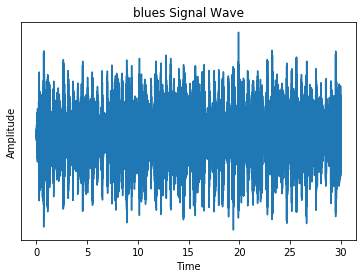

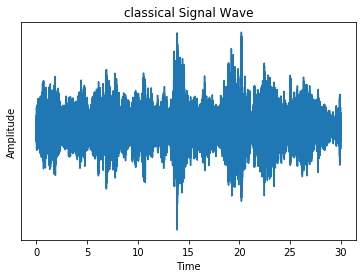

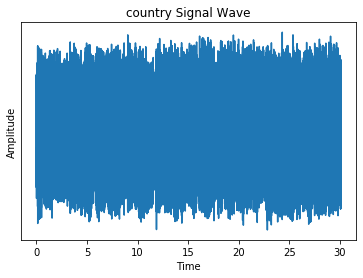

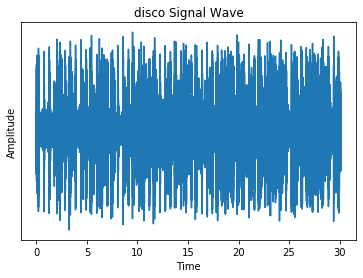

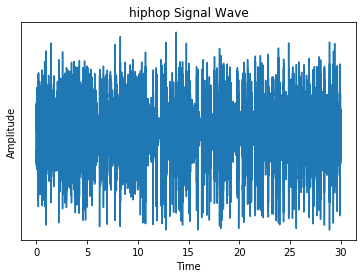

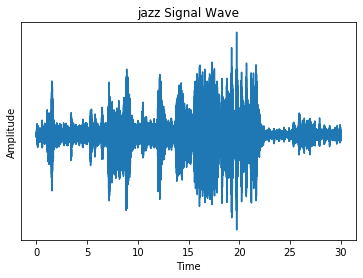

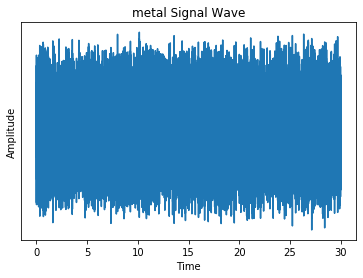

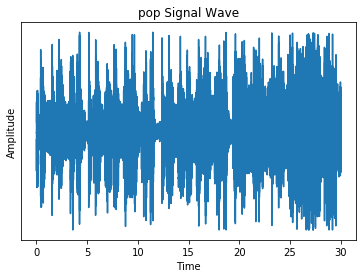

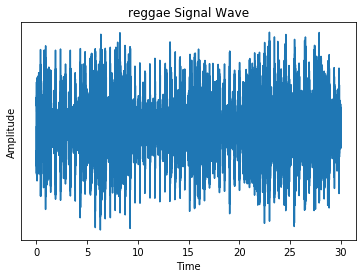

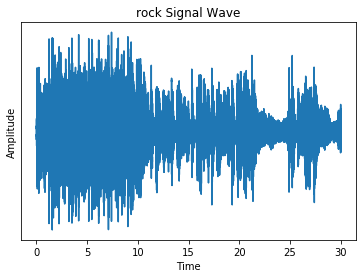

In [2]:
genres='blues classical country disco hiphop jazz metal pop reggae rock'.split()
for i,genre in enumerate(genres):
    y,sr=librosa.core.load(f'c:/Users/R. Harini/genres/{genre}/{genre}.00000.au')
    time=np.linspace(0,len(y)/sr,num=len(y))
    plt.figure(i+1)
    plt.title(genre+" Signal Wave")
    plt.yticks(ticks=[])
    plt.plot(time,y)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

### MFCCs

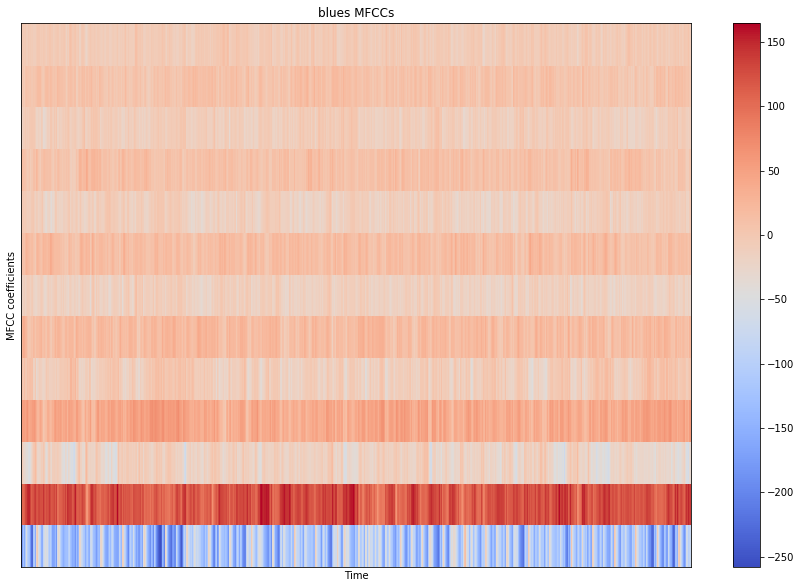

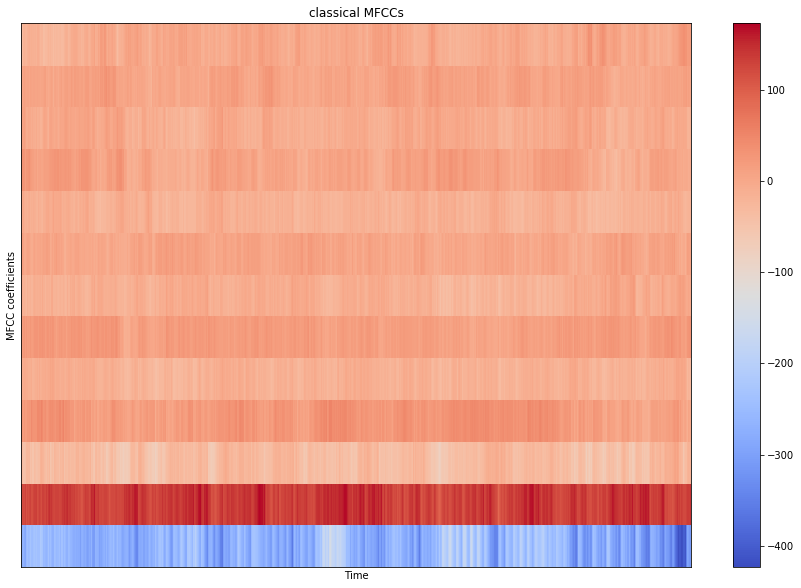

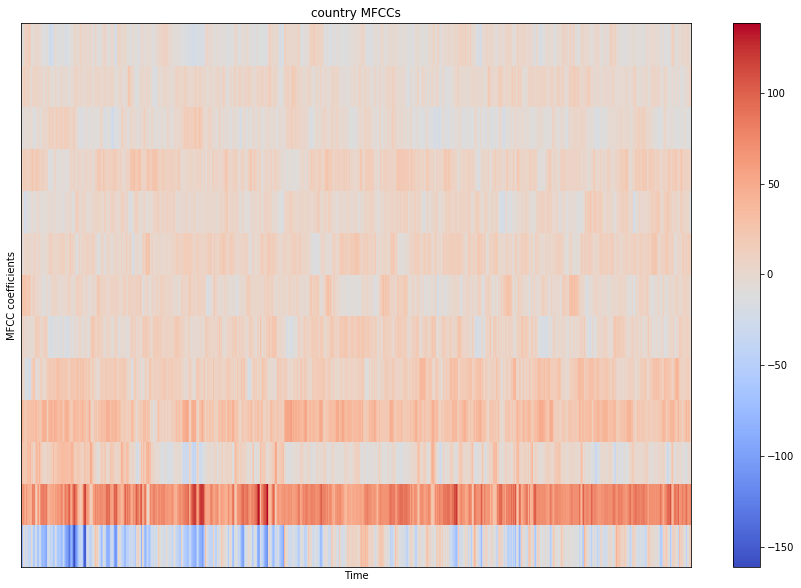

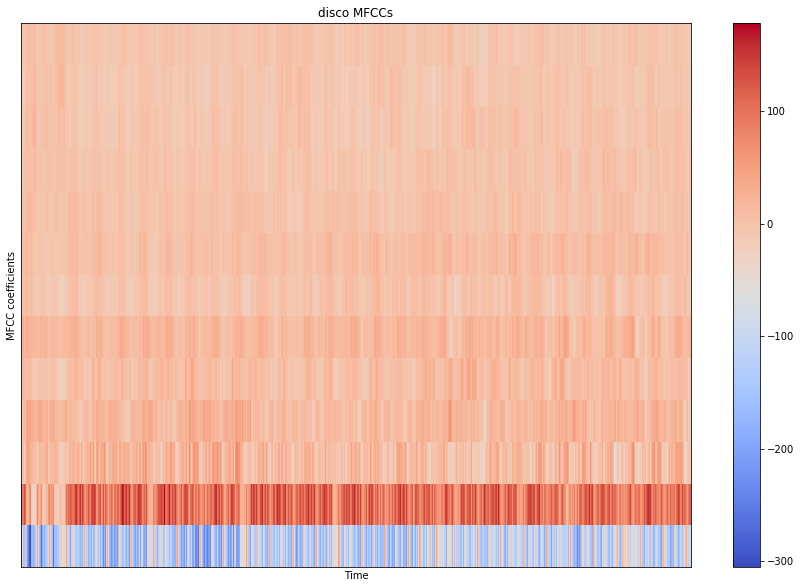

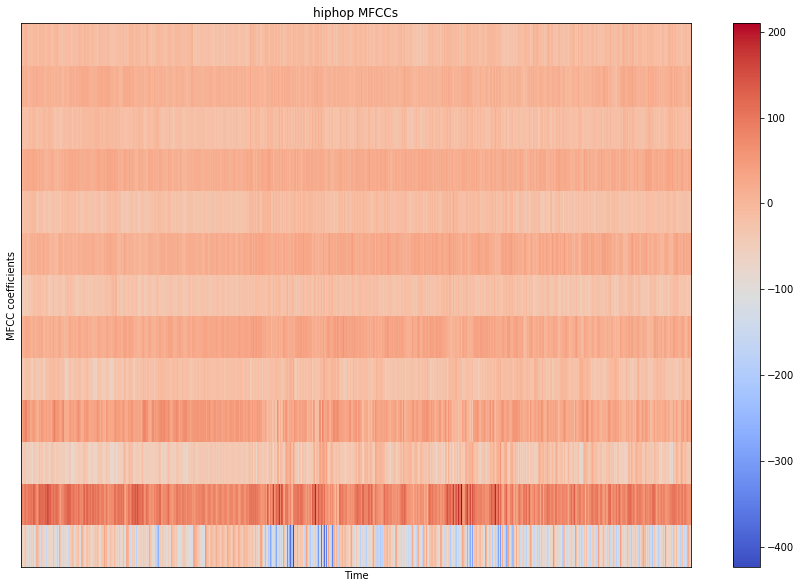

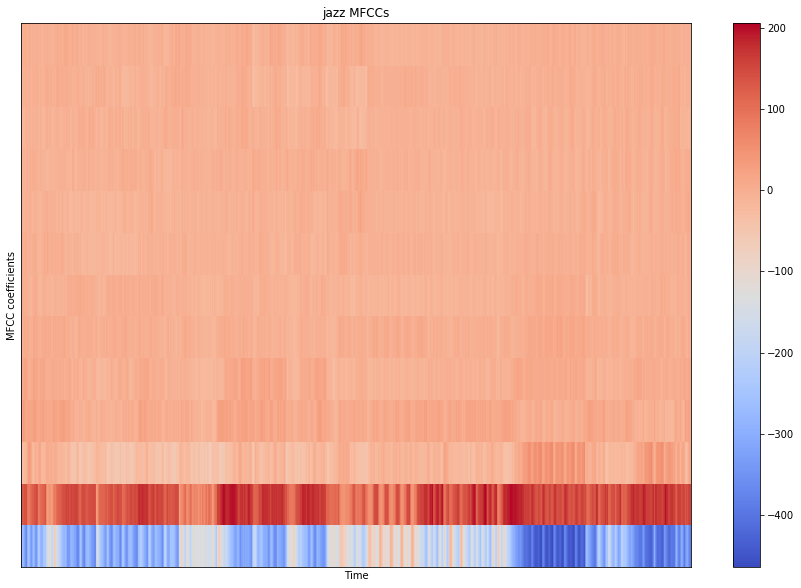

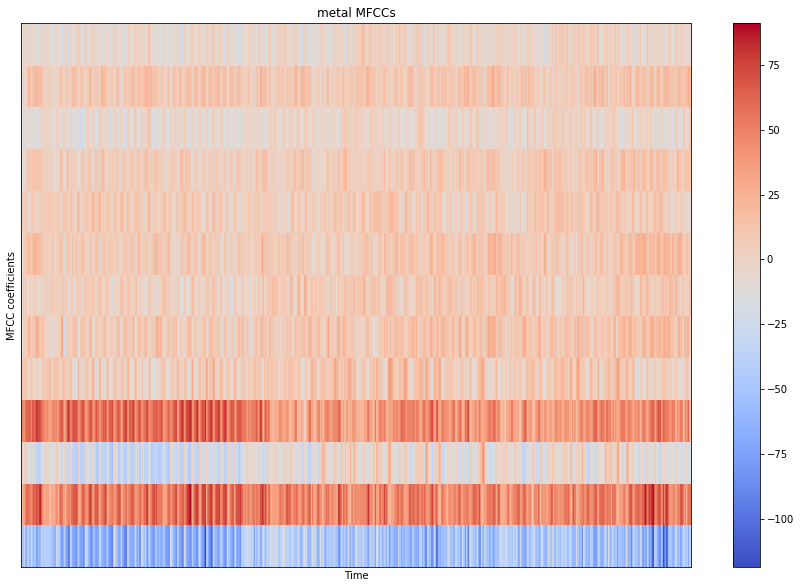

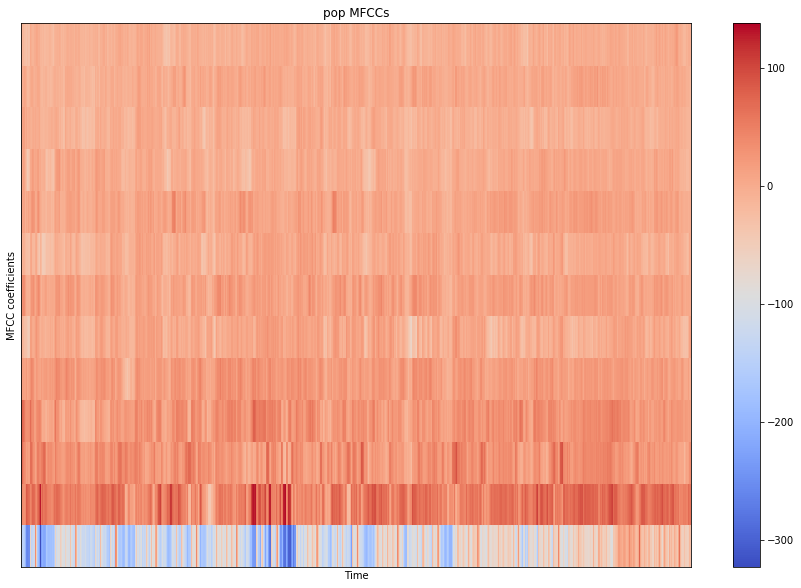

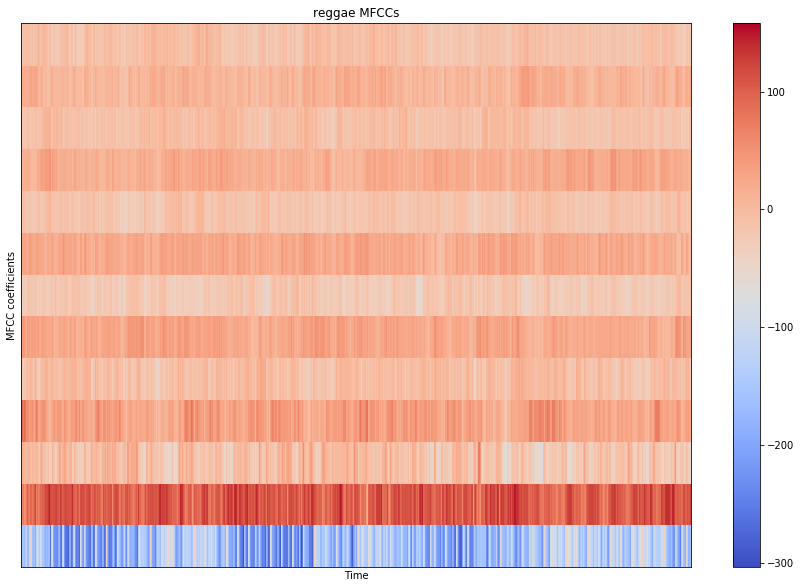

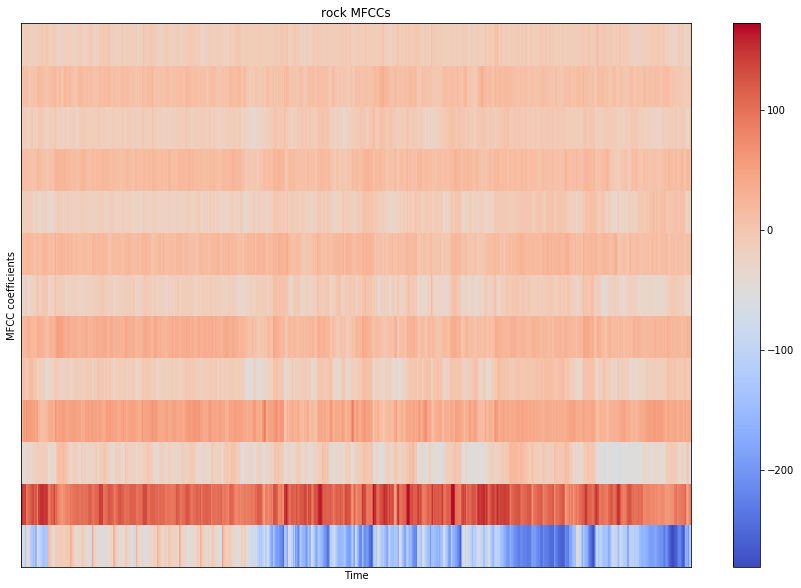

In [3]:
genres='blues classical country disco hiphop jazz metal pop reggae rock'.split()
for i,genre in enumerate(genres):
    signal,sr=librosa.core.load(f'c:/Users/R. Harini/genres/{genre}/{genre}.00000.au')
    MFCCs=librosa.feature.mfcc(signal,n_fft=2048,hop_length=512,n_mfcc=13)
    plt.figure(figsize=(15,10))
    librosa.display.specshow(MFCCs,sr=22050,hop_length=512)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title(genre+" MFCCs")
    plt.show()

### Dataset Preparation

In [3]:
#extracting MFCCs and genre labels and saving it in a json file

DATASET_PATH="c:/Users/R. Harini/genres"
JSON_PATH="data_.json"
SAMPLE_RATE=22050
TRACK_DURATION=30 # measured in seconds
SAMPLES_PER_TRACK=SAMPLE_RATE*TRACK_DURATION


def save_mfcc(dataset_path,json_path,num_mfcc=13,n_fft=2048,hop_length=512,num_segments=10):

    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment=int(SAMPLES_PER_TRACK/num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment/hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("\\")[-1] #genres\\blues=>["genres","blues"]
            data["mapping"].append(semantic_label)
            print("\nProcessing:{}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start=samples_per_segment * d
                    finish=start+samples_per_segment

                    # extract mfcc
                    mfcc=librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc=mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc)==num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path,d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data,fp,indent=4)


if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: blues
c:/Users/R. Harini/genres\blues\blues.00000.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00000.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00000.au, segment:3
c:/Users/R. Harini/genres\blues\blues.00000.au, segment:4
c:/Users/R. Harini/genres\blues\blues.00000.au, segment:5
c:/Users/R. Harini/genres\blues\blues.00000.au, segment:6
c:/Users/R. Harini/genres\blues\blues.00000.au, segment:7
c:/Users/R. Harini/genres\blues\blues.00000.au, segment:8
c:/Users/R. Harini/genres\blues\blues.00000.au, segment:9
c:/Users/R. Harini/genres\blues\blues.00000.au, segment:10
c:/Users/R. Harini/genres\blues\blues.00001.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00001.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00001.au, segment:3
c:/Users/R. Harini/genres\blues\blues.00001.au, segment:4
c:/Users/R. Harini/genres\blues\blues.00001.au, segment:5
c:/Users/R. Harini/genres\blues\blues.00001.au, segment:6
c:/Users/R. Harini/genres\blues\blues.00001.au, segm

c:/Users/R. Harini/genres\blues\blues.00015.au, segment:7
c:/Users/R. Harini/genres\blues\blues.00015.au, segment:8
c:/Users/R. Harini/genres\blues\blues.00015.au, segment:9
c:/Users/R. Harini/genres\blues\blues.00015.au, segment:10
c:/Users/R. Harini/genres\blues\blues.00016.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00016.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00016.au, segment:3
c:/Users/R. Harini/genres\blues\blues.00016.au, segment:4
c:/Users/R. Harini/genres\blues\blues.00016.au, segment:5
c:/Users/R. Harini/genres\blues\blues.00016.au, segment:6
c:/Users/R. Harini/genres\blues\blues.00016.au, segment:7
c:/Users/R. Harini/genres\blues\blues.00016.au, segment:8
c:/Users/R. Harini/genres\blues\blues.00016.au, segment:9
c:/Users/R. Harini/genres\blues\blues.00016.au, segment:10
c:/Users/R. Harini/genres\blues\blues.00017.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00017.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00017.au, segment:3
c:/Users/R. 

c:/Users/R. Harini/genres\blues\blues.00030.au, segment:8
c:/Users/R. Harini/genres\blues\blues.00030.au, segment:9
c:/Users/R. Harini/genres\blues\blues.00030.au, segment:10
c:/Users/R. Harini/genres\blues\blues.00031.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00031.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00031.au, segment:3
c:/Users/R. Harini/genres\blues\blues.00031.au, segment:4
c:/Users/R. Harini/genres\blues\blues.00031.au, segment:5
c:/Users/R. Harini/genres\blues\blues.00031.au, segment:6
c:/Users/R. Harini/genres\blues\blues.00031.au, segment:7
c:/Users/R. Harini/genres\blues\blues.00031.au, segment:8
c:/Users/R. Harini/genres\blues\blues.00031.au, segment:9
c:/Users/R. Harini/genres\blues\blues.00031.au, segment:10
c:/Users/R. Harini/genres\blues\blues.00032.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00032.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00032.au, segment:3
c:/Users/R. Harini/genres\blues\blues.00032.au, segment:4
c:/Users/R. 

c:/Users/R. Harini/genres\blues\blues.00045.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00045.au, segment:3
c:/Users/R. Harini/genres\blues\blues.00045.au, segment:4
c:/Users/R. Harini/genres\blues\blues.00045.au, segment:5
c:/Users/R. Harini/genres\blues\blues.00045.au, segment:6
c:/Users/R. Harini/genres\blues\blues.00045.au, segment:7
c:/Users/R. Harini/genres\blues\blues.00045.au, segment:8
c:/Users/R. Harini/genres\blues\blues.00045.au, segment:9
c:/Users/R. Harini/genres\blues\blues.00045.au, segment:10
c:/Users/R. Harini/genres\blues\blues.00046.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00046.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00046.au, segment:3
c:/Users/R. Harini/genres\blues\blues.00046.au, segment:4
c:/Users/R. Harini/genres\blues\blues.00046.au, segment:5
c:/Users/R. Harini/genres\blues\blues.00046.au, segment:6
c:/Users/R. Harini/genres\blues\blues.00046.au, segment:7
c:/Users/R. Harini/genres\blues\blues.00046.au, segment:8
c:/Users/R. H

c:/Users/R. Harini/genres\blues\blues.00060.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00060.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00060.au, segment:3
c:/Users/R. Harini/genres\blues\blues.00060.au, segment:4
c:/Users/R. Harini/genres\blues\blues.00060.au, segment:5
c:/Users/R. Harini/genres\blues\blues.00060.au, segment:6
c:/Users/R. Harini/genres\blues\blues.00060.au, segment:7
c:/Users/R. Harini/genres\blues\blues.00060.au, segment:8
c:/Users/R. Harini/genres\blues\blues.00060.au, segment:9
c:/Users/R. Harini/genres\blues\blues.00060.au, segment:10
c:/Users/R. Harini/genres\blues\blues.00061.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00061.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00061.au, segment:3
c:/Users/R. Harini/genres\blues\blues.00061.au, segment:4
c:/Users/R. Harini/genres\blues\blues.00061.au, segment:5
c:/Users/R. Harini/genres\blues\blues.00061.au, segment:6
c:/Users/R. Harini/genres\blues\blues.00061.au, segment:7
c:/Users/R. H

c:/Users/R. Harini/genres\blues\blues.00075.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00075.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00075.au, segment:3
c:/Users/R. Harini/genres\blues\blues.00075.au, segment:4
c:/Users/R. Harini/genres\blues\blues.00075.au, segment:5
c:/Users/R. Harini/genres\blues\blues.00075.au, segment:6
c:/Users/R. Harini/genres\blues\blues.00075.au, segment:7
c:/Users/R. Harini/genres\blues\blues.00075.au, segment:8
c:/Users/R. Harini/genres\blues\blues.00075.au, segment:9
c:/Users/R. Harini/genres\blues\blues.00075.au, segment:10
c:/Users/R. Harini/genres\blues\blues.00076.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00076.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00076.au, segment:3
c:/Users/R. Harini/genres\blues\blues.00076.au, segment:4
c:/Users/R. Harini/genres\blues\blues.00076.au, segment:5
c:/Users/R. Harini/genres\blues\blues.00076.au, segment:6
c:/Users/R. Harini/genres\blues\blues.00076.au, segment:7
c:/Users/R. H

c:/Users/R. Harini/genres\blues\blues.00090.au, segment:7
c:/Users/R. Harini/genres\blues\blues.00090.au, segment:8
c:/Users/R. Harini/genres\blues\blues.00090.au, segment:9
c:/Users/R. Harini/genres\blues\blues.00090.au, segment:10
c:/Users/R. Harini/genres\blues\blues.00091.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00091.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00091.au, segment:3
c:/Users/R. Harini/genres\blues\blues.00091.au, segment:4
c:/Users/R. Harini/genres\blues\blues.00091.au, segment:5
c:/Users/R. Harini/genres\blues\blues.00091.au, segment:6
c:/Users/R. Harini/genres\blues\blues.00091.au, segment:7
c:/Users/R. Harini/genres\blues\blues.00091.au, segment:8
c:/Users/R. Harini/genres\blues\blues.00091.au, segment:9
c:/Users/R. Harini/genres\blues\blues.00091.au, segment:10
c:/Users/R. Harini/genres\blues\blues.00092.au, segment:1
c:/Users/R. Harini/genres\blues\blues.00092.au, segment:2
c:/Users/R. Harini/genres\blues\blues.00092.au, segment:3
c:/Users/R. 

c:/Users/R. Harini/genres\classical\classical.00005.au, segment:4
c:/Users/R. Harini/genres\classical\classical.00005.au, segment:5
c:/Users/R. Harini/genres\classical\classical.00005.au, segment:6
c:/Users/R. Harini/genres\classical\classical.00005.au, segment:7
c:/Users/R. Harini/genres\classical\classical.00005.au, segment:8
c:/Users/R. Harini/genres\classical\classical.00005.au, segment:9
c:/Users/R. Harini/genres\classical\classical.00005.au, segment:10
c:/Users/R. Harini/genres\classical\classical.00006.au, segment:1
c:/Users/R. Harini/genres\classical\classical.00006.au, segment:2
c:/Users/R. Harini/genres\classical\classical.00006.au, segment:3
c:/Users/R. Harini/genres\classical\classical.00006.au, segment:4
c:/Users/R. Harini/genres\classical\classical.00006.au, segment:5
c:/Users/R. Harini/genres\classical\classical.00006.au, segment:6
c:/Users/R. Harini/genres\classical\classical.00006.au, segment:7
c:/Users/R. Harini/genres\classical\classical.00006.au, segment:8
c:/Users/

c:/Users/R. Harini/genres\classical\classical.00018.au, segment:8
c:/Users/R. Harini/genres\classical\classical.00018.au, segment:9
c:/Users/R. Harini/genres\classical\classical.00018.au, segment:10
c:/Users/R. Harini/genres\classical\classical.00019.au, segment:1
c:/Users/R. Harini/genres\classical\classical.00019.au, segment:2
c:/Users/R. Harini/genres\classical\classical.00019.au, segment:3
c:/Users/R. Harini/genres\classical\classical.00019.au, segment:4
c:/Users/R. Harini/genres\classical\classical.00019.au, segment:5
c:/Users/R. Harini/genres\classical\classical.00019.au, segment:6
c:/Users/R. Harini/genres\classical\classical.00019.au, segment:7
c:/Users/R. Harini/genres\classical\classical.00019.au, segment:8
c:/Users/R. Harini/genres\classical\classical.00019.au, segment:9
c:/Users/R. Harini/genres\classical\classical.00019.au, segment:10
c:/Users/R. Harini/genres\classical\classical.00020.au, segment:1
c:/Users/R. Harini/genres\classical\classical.00020.au, segment:2
c:/Users

c:/Users/R. Harini/genres\classical\classical.00032.au, segment:1
c:/Users/R. Harini/genres\classical\classical.00032.au, segment:2
c:/Users/R. Harini/genres\classical\classical.00032.au, segment:3
c:/Users/R. Harini/genres\classical\classical.00032.au, segment:4
c:/Users/R. Harini/genres\classical\classical.00032.au, segment:5
c:/Users/R. Harini/genres\classical\classical.00032.au, segment:6
c:/Users/R. Harini/genres\classical\classical.00032.au, segment:7
c:/Users/R. Harini/genres\classical\classical.00032.au, segment:8
c:/Users/R. Harini/genres\classical\classical.00032.au, segment:9
c:/Users/R. Harini/genres\classical\classical.00032.au, segment:10
c:/Users/R. Harini/genres\classical\classical.00033.au, segment:1
c:/Users/R. Harini/genres\classical\classical.00033.au, segment:2
c:/Users/R. Harini/genres\classical\classical.00033.au, segment:3
c:/Users/R. Harini/genres\classical\classical.00033.au, segment:4
c:/Users/R. Harini/genres\classical\classical.00033.au, segment:5
c:/Users/

c:/Users/R. Harini/genres\classical\classical.00044.au, segment:9
c:/Users/R. Harini/genres\classical\classical.00044.au, segment:10
c:/Users/R. Harini/genres\classical\classical.00045.au, segment:1
c:/Users/R. Harini/genres\classical\classical.00045.au, segment:2
c:/Users/R. Harini/genres\classical\classical.00045.au, segment:3
c:/Users/R. Harini/genres\classical\classical.00045.au, segment:4
c:/Users/R. Harini/genres\classical\classical.00045.au, segment:5
c:/Users/R. Harini/genres\classical\classical.00045.au, segment:6
c:/Users/R. Harini/genres\classical\classical.00045.au, segment:7
c:/Users/R. Harini/genres\classical\classical.00045.au, segment:8
c:/Users/R. Harini/genres\classical\classical.00045.au, segment:9
c:/Users/R. Harini/genres\classical\classical.00045.au, segment:10
c:/Users/R. Harini/genres\classical\classical.00046.au, segment:1
c:/Users/R. Harini/genres\classical\classical.00046.au, segment:2
c:/Users/R. Harini/genres\classical\classical.00046.au, segment:3
c:/Users

c:/Users/R. Harini/genres\classical\classical.00058.au, segment:2
c:/Users/R. Harini/genres\classical\classical.00058.au, segment:3
c:/Users/R. Harini/genres\classical\classical.00058.au, segment:4
c:/Users/R. Harini/genres\classical\classical.00058.au, segment:5
c:/Users/R. Harini/genres\classical\classical.00058.au, segment:6
c:/Users/R. Harini/genres\classical\classical.00058.au, segment:7
c:/Users/R. Harini/genres\classical\classical.00058.au, segment:8
c:/Users/R. Harini/genres\classical\classical.00058.au, segment:9
c:/Users/R. Harini/genres\classical\classical.00058.au, segment:10
c:/Users/R. Harini/genres\classical\classical.00059.au, segment:1
c:/Users/R. Harini/genres\classical\classical.00059.au, segment:2
c:/Users/R. Harini/genres\classical\classical.00059.au, segment:3
c:/Users/R. Harini/genres\classical\classical.00059.au, segment:4
c:/Users/R. Harini/genres\classical\classical.00059.au, segment:5
c:/Users/R. Harini/genres\classical\classical.00059.au, segment:6
c:/Users/

c:/Users/R. Harini/genres\classical\classical.00070.au, segment:6
c:/Users/R. Harini/genres\classical\classical.00070.au, segment:7
c:/Users/R. Harini/genres\classical\classical.00070.au, segment:8
c:/Users/R. Harini/genres\classical\classical.00070.au, segment:9
c:/Users/R. Harini/genres\classical\classical.00070.au, segment:10
c:/Users/R. Harini/genres\classical\classical.00071.au, segment:1
c:/Users/R. Harini/genres\classical\classical.00071.au, segment:2
c:/Users/R. Harini/genres\classical\classical.00071.au, segment:3
c:/Users/R. Harini/genres\classical\classical.00071.au, segment:4
c:/Users/R. Harini/genres\classical\classical.00071.au, segment:5
c:/Users/R. Harini/genres\classical\classical.00071.au, segment:6
c:/Users/R. Harini/genres\classical\classical.00071.au, segment:7
c:/Users/R. Harini/genres\classical\classical.00071.au, segment:8
c:/Users/R. Harini/genres\classical\classical.00071.au, segment:9
c:/Users/R. Harini/genres\classical\classical.00071.au, segment:10
c:/Users

c:/Users/R. Harini/genres\classical\classical.00083.au, segment:6
c:/Users/R. Harini/genres\classical\classical.00083.au, segment:7
c:/Users/R. Harini/genres\classical\classical.00083.au, segment:8
c:/Users/R. Harini/genres\classical\classical.00083.au, segment:9
c:/Users/R. Harini/genres\classical\classical.00083.au, segment:10
c:/Users/R. Harini/genres\classical\classical.00084.au, segment:1
c:/Users/R. Harini/genres\classical\classical.00084.au, segment:2
c:/Users/R. Harini/genres\classical\classical.00084.au, segment:3
c:/Users/R. Harini/genres\classical\classical.00084.au, segment:4
c:/Users/R. Harini/genres\classical\classical.00084.au, segment:5
c:/Users/R. Harini/genres\classical\classical.00084.au, segment:6
c:/Users/R. Harini/genres\classical\classical.00084.au, segment:7
c:/Users/R. Harini/genres\classical\classical.00084.au, segment:8
c:/Users/R. Harini/genres\classical\classical.00084.au, segment:9
c:/Users/R. Harini/genres\classical\classical.00084.au, segment:10
c:/Users

c:/Users/R. Harini/genres\classical\classical.00096.au, segment:3
c:/Users/R. Harini/genres\classical\classical.00096.au, segment:4
c:/Users/R. Harini/genres\classical\classical.00096.au, segment:5
c:/Users/R. Harini/genres\classical\classical.00096.au, segment:6
c:/Users/R. Harini/genres\classical\classical.00096.au, segment:7
c:/Users/R. Harini/genres\classical\classical.00096.au, segment:8
c:/Users/R. Harini/genres\classical\classical.00096.au, segment:9
c:/Users/R. Harini/genres\classical\classical.00096.au, segment:10
c:/Users/R. Harini/genres\classical\classical.00097.au, segment:1
c:/Users/R. Harini/genres\classical\classical.00097.au, segment:2
c:/Users/R. Harini/genres\classical\classical.00097.au, segment:3
c:/Users/R. Harini/genres\classical\classical.00097.au, segment:4
c:/Users/R. Harini/genres\classical\classical.00097.au, segment:5
c:/Users/R. Harini/genres\classical\classical.00097.au, segment:6
c:/Users/R. Harini/genres\classical\classical.00097.au, segment:7
c:/Users/

c:/Users/R. Harini/genres\country\country.00009.au, segment:5
c:/Users/R. Harini/genres\country\country.00009.au, segment:6
c:/Users/R. Harini/genres\country\country.00009.au, segment:7
c:/Users/R. Harini/genres\country\country.00009.au, segment:8
c:/Users/R. Harini/genres\country\country.00009.au, segment:9
c:/Users/R. Harini/genres\country\country.00009.au, segment:10
c:/Users/R. Harini/genres\country\country.00010.au, segment:1
c:/Users/R. Harini/genres\country\country.00010.au, segment:2
c:/Users/R. Harini/genres\country\country.00010.au, segment:3
c:/Users/R. Harini/genres\country\country.00010.au, segment:4
c:/Users/R. Harini/genres\country\country.00010.au, segment:5
c:/Users/R. Harini/genres\country\country.00010.au, segment:6
c:/Users/R. Harini/genres\country\country.00010.au, segment:7
c:/Users/R. Harini/genres\country\country.00010.au, segment:8
c:/Users/R. Harini/genres\country\country.00010.au, segment:9
c:/Users/R. Harini/genres\country\country.00010.au, segment:10
c:/Use

c:/Users/R. Harini/genres\country\country.00022.au, segment:10
c:/Users/R. Harini/genres\country\country.00023.au, segment:1
c:/Users/R. Harini/genres\country\country.00023.au, segment:2
c:/Users/R. Harini/genres\country\country.00023.au, segment:3
c:/Users/R. Harini/genres\country\country.00023.au, segment:4
c:/Users/R. Harini/genres\country\country.00023.au, segment:5
c:/Users/R. Harini/genres\country\country.00023.au, segment:6
c:/Users/R. Harini/genres\country\country.00023.au, segment:7
c:/Users/R. Harini/genres\country\country.00023.au, segment:8
c:/Users/R. Harini/genres\country\country.00023.au, segment:9
c:/Users/R. Harini/genres\country\country.00023.au, segment:10
c:/Users/R. Harini/genres\country\country.00024.au, segment:1
c:/Users/R. Harini/genres\country\country.00024.au, segment:2
c:/Users/R. Harini/genres\country\country.00024.au, segment:3
c:/Users/R. Harini/genres\country\country.00024.au, segment:4
c:/Users/R. Harini/genres\country\country.00024.au, segment:5
c:/Use

c:/Users/R. Harini/genres\country\country.00036.au, segment:9
c:/Users/R. Harini/genres\country\country.00036.au, segment:10
c:/Users/R. Harini/genres\country\country.00037.au, segment:1
c:/Users/R. Harini/genres\country\country.00037.au, segment:2
c:/Users/R. Harini/genres\country\country.00037.au, segment:3
c:/Users/R. Harini/genres\country\country.00037.au, segment:4
c:/Users/R. Harini/genres\country\country.00037.au, segment:5
c:/Users/R. Harini/genres\country\country.00037.au, segment:6
c:/Users/R. Harini/genres\country\country.00037.au, segment:7
c:/Users/R. Harini/genres\country\country.00037.au, segment:8
c:/Users/R. Harini/genres\country\country.00037.au, segment:9
c:/Users/R. Harini/genres\country\country.00037.au, segment:10
c:/Users/R. Harini/genres\country\country.00038.au, segment:1
c:/Users/R. Harini/genres\country\country.00038.au, segment:2
c:/Users/R. Harini/genres\country\country.00038.au, segment:3
c:/Users/R. Harini/genres\country\country.00038.au, segment:4
c:/Use

c:/Users/R. Harini/genres\country\country.00050.au, segment:1
c:/Users/R. Harini/genres\country\country.00050.au, segment:2
c:/Users/R. Harini/genres\country\country.00050.au, segment:3
c:/Users/R. Harini/genres\country\country.00050.au, segment:4
c:/Users/R. Harini/genres\country\country.00050.au, segment:5
c:/Users/R. Harini/genres\country\country.00050.au, segment:6
c:/Users/R. Harini/genres\country\country.00050.au, segment:7
c:/Users/R. Harini/genres\country\country.00050.au, segment:8
c:/Users/R. Harini/genres\country\country.00050.au, segment:9
c:/Users/R. Harini/genres\country\country.00050.au, segment:10
c:/Users/R. Harini/genres\country\country.00051.au, segment:1
c:/Users/R. Harini/genres\country\country.00051.au, segment:2
c:/Users/R. Harini/genres\country\country.00051.au, segment:3
c:/Users/R. Harini/genres\country\country.00051.au, segment:4
c:/Users/R. Harini/genres\country\country.00051.au, segment:5
c:/Users/R. Harini/genres\country\country.00051.au, segment:6
c:/User

c:/Users/R. Harini/genres\country\country.00064.au, segment:1
c:/Users/R. Harini/genres\country\country.00064.au, segment:2
c:/Users/R. Harini/genres\country\country.00064.au, segment:3
c:/Users/R. Harini/genres\country\country.00064.au, segment:4
c:/Users/R. Harini/genres\country\country.00064.au, segment:5
c:/Users/R. Harini/genres\country\country.00064.au, segment:6
c:/Users/R. Harini/genres\country\country.00064.au, segment:7
c:/Users/R. Harini/genres\country\country.00064.au, segment:8
c:/Users/R. Harini/genres\country\country.00064.au, segment:9
c:/Users/R. Harini/genres\country\country.00064.au, segment:10
c:/Users/R. Harini/genres\country\country.00065.au, segment:1
c:/Users/R. Harini/genres\country\country.00065.au, segment:2
c:/Users/R. Harini/genres\country\country.00065.au, segment:3
c:/Users/R. Harini/genres\country\country.00065.au, segment:4
c:/Users/R. Harini/genres\country\country.00065.au, segment:5
c:/Users/R. Harini/genres\country\country.00065.au, segment:6
c:/User

c:/Users/R. Harini/genres\country\country.00077.au, segment:4
c:/Users/R. Harini/genres\country\country.00077.au, segment:5
c:/Users/R. Harini/genres\country\country.00077.au, segment:6
c:/Users/R. Harini/genres\country\country.00077.au, segment:7
c:/Users/R. Harini/genres\country\country.00077.au, segment:8
c:/Users/R. Harini/genres\country\country.00077.au, segment:9
c:/Users/R. Harini/genres\country\country.00077.au, segment:10
c:/Users/R. Harini/genres\country\country.00078.au, segment:1
c:/Users/R. Harini/genres\country\country.00078.au, segment:2
c:/Users/R. Harini/genres\country\country.00078.au, segment:3
c:/Users/R. Harini/genres\country\country.00078.au, segment:4
c:/Users/R. Harini/genres\country\country.00078.au, segment:5
c:/Users/R. Harini/genres\country\country.00078.au, segment:6
c:/Users/R. Harini/genres\country\country.00078.au, segment:7
c:/Users/R. Harini/genres\country\country.00078.au, segment:8
c:/Users/R. Harini/genres\country\country.00078.au, segment:9
c:/User

c:/Users/R. Harini/genres\country\country.00090.au, segment:10
c:/Users/R. Harini/genres\country\country.00091.au, segment:1
c:/Users/R. Harini/genres\country\country.00091.au, segment:2
c:/Users/R. Harini/genres\country\country.00091.au, segment:3
c:/Users/R. Harini/genres\country\country.00091.au, segment:4
c:/Users/R. Harini/genres\country\country.00091.au, segment:5
c:/Users/R. Harini/genres\country\country.00091.au, segment:6
c:/Users/R. Harini/genres\country\country.00091.au, segment:7
c:/Users/R. Harini/genres\country\country.00091.au, segment:8
c:/Users/R. Harini/genres\country\country.00091.au, segment:9
c:/Users/R. Harini/genres\country\country.00091.au, segment:10
c:/Users/R. Harini/genres\country\country.00092.au, segment:1
c:/Users/R. Harini/genres\country\country.00092.au, segment:2
c:/Users/R. Harini/genres\country\country.00092.au, segment:3
c:/Users/R. Harini/genres\country\country.00092.au, segment:4
c:/Users/R. Harini/genres\country\country.00092.au, segment:5
c:/Use

c:/Users/R. Harini/genres\disco\disco.00005.au, segment:8
c:/Users/R. Harini/genres\disco\disco.00005.au, segment:9
c:/Users/R. Harini/genres\disco\disco.00005.au, segment:10
c:/Users/R. Harini/genres\disco\disco.00006.au, segment:1
c:/Users/R. Harini/genres\disco\disco.00006.au, segment:2
c:/Users/R. Harini/genres\disco\disco.00006.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00006.au, segment:4
c:/Users/R. Harini/genres\disco\disco.00006.au, segment:5
c:/Users/R. Harini/genres\disco\disco.00006.au, segment:6
c:/Users/R. Harini/genres\disco\disco.00006.au, segment:7
c:/Users/R. Harini/genres\disco\disco.00006.au, segment:8
c:/Users/R. Harini/genres\disco\disco.00006.au, segment:9
c:/Users/R. Harini/genres\disco\disco.00006.au, segment:10
c:/Users/R. Harini/genres\disco\disco.00007.au, segment:1
c:/Users/R. Harini/genres\disco\disco.00007.au, segment:2
c:/Users/R. Harini/genres\disco\disco.00007.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00007.au, segment:4
c:/Users/R. 

c:/Users/R. Harini/genres\disco\disco.00020.au, segment:2
c:/Users/R. Harini/genres\disco\disco.00020.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00020.au, segment:4
c:/Users/R. Harini/genres\disco\disco.00020.au, segment:5
c:/Users/R. Harini/genres\disco\disco.00020.au, segment:6
c:/Users/R. Harini/genres\disco\disco.00020.au, segment:7
c:/Users/R. Harini/genres\disco\disco.00020.au, segment:8
c:/Users/R. Harini/genres\disco\disco.00020.au, segment:9
c:/Users/R. Harini/genres\disco\disco.00020.au, segment:10
c:/Users/R. Harini/genres\disco\disco.00021.au, segment:1
c:/Users/R. Harini/genres\disco\disco.00021.au, segment:2
c:/Users/R. Harini/genres\disco\disco.00021.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00021.au, segment:4
c:/Users/R. Harini/genres\disco\disco.00021.au, segment:5
c:/Users/R. Harini/genres\disco\disco.00021.au, segment:6
c:/Users/R. Harini/genres\disco\disco.00021.au, segment:7
c:/Users/R. Harini/genres\disco\disco.00021.au, segment:8
c:/Users/R. H

c:/Users/R. Harini/genres\disco\disco.00035.au, segment:8
c:/Users/R. Harini/genres\disco\disco.00035.au, segment:9
c:/Users/R. Harini/genres\disco\disco.00035.au, segment:10
c:/Users/R. Harini/genres\disco\disco.00036.au, segment:1
c:/Users/R. Harini/genres\disco\disco.00036.au, segment:2
c:/Users/R. Harini/genres\disco\disco.00036.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00036.au, segment:4
c:/Users/R. Harini/genres\disco\disco.00036.au, segment:5
c:/Users/R. Harini/genres\disco\disco.00036.au, segment:6
c:/Users/R. Harini/genres\disco\disco.00036.au, segment:7
c:/Users/R. Harini/genres\disco\disco.00036.au, segment:8
c:/Users/R. Harini/genres\disco\disco.00036.au, segment:9
c:/Users/R. Harini/genres\disco\disco.00036.au, segment:10
c:/Users/R. Harini/genres\disco\disco.00037.au, segment:1
c:/Users/R. Harini/genres\disco\disco.00037.au, segment:2
c:/Users/R. Harini/genres\disco\disco.00037.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00037.au, segment:4
c:/Users/R. 

c:/Users/R. Harini/genres\disco\disco.00050.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00050.au, segment:4
c:/Users/R. Harini/genres\disco\disco.00050.au, segment:5
c:/Users/R. Harini/genres\disco\disco.00050.au, segment:6
c:/Users/R. Harini/genres\disco\disco.00050.au, segment:7
c:/Users/R. Harini/genres\disco\disco.00050.au, segment:8
c:/Users/R. Harini/genres\disco\disco.00050.au, segment:9
c:/Users/R. Harini/genres\disco\disco.00050.au, segment:10
c:/Users/R. Harini/genres\disco\disco.00051.au, segment:1
c:/Users/R. Harini/genres\disco\disco.00051.au, segment:2
c:/Users/R. Harini/genres\disco\disco.00051.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00051.au, segment:4
c:/Users/R. Harini/genres\disco\disco.00051.au, segment:5
c:/Users/R. Harini/genres\disco\disco.00051.au, segment:6
c:/Users/R. Harini/genres\disco\disco.00051.au, segment:7
c:/Users/R. Harini/genres\disco\disco.00051.au, segment:8
c:/Users/R. Harini/genres\disco\disco.00051.au, segment:9
c:/Users/R. H

c:/Users/R. Harini/genres\disco\disco.00065.au, segment:1
c:/Users/R. Harini/genres\disco\disco.00065.au, segment:2
c:/Users/R. Harini/genres\disco\disco.00065.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00065.au, segment:4
c:/Users/R. Harini/genres\disco\disco.00065.au, segment:5
c:/Users/R. Harini/genres\disco\disco.00065.au, segment:6
c:/Users/R. Harini/genres\disco\disco.00065.au, segment:7
c:/Users/R. Harini/genres\disco\disco.00065.au, segment:8
c:/Users/R. Harini/genres\disco\disco.00065.au, segment:9
c:/Users/R. Harini/genres\disco\disco.00065.au, segment:10
c:/Users/R. Harini/genres\disco\disco.00066.au, segment:1
c:/Users/R. Harini/genres\disco\disco.00066.au, segment:2
c:/Users/R. Harini/genres\disco\disco.00066.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00066.au, segment:4
c:/Users/R. Harini/genres\disco\disco.00066.au, segment:5
c:/Users/R. Harini/genres\disco\disco.00066.au, segment:6
c:/Users/R. Harini/genres\disco\disco.00066.au, segment:7
c:/Users/R. H

c:/Users/R. Harini/genres\disco\disco.00080.au, segment:1
c:/Users/R. Harini/genres\disco\disco.00080.au, segment:2
c:/Users/R. Harini/genres\disco\disco.00080.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00080.au, segment:4
c:/Users/R. Harini/genres\disco\disco.00080.au, segment:5
c:/Users/R. Harini/genres\disco\disco.00080.au, segment:6
c:/Users/R. Harini/genres\disco\disco.00080.au, segment:7
c:/Users/R. Harini/genres\disco\disco.00080.au, segment:8
c:/Users/R. Harini/genres\disco\disco.00080.au, segment:9
c:/Users/R. Harini/genres\disco\disco.00080.au, segment:10
c:/Users/R. Harini/genres\disco\disco.00081.au, segment:1
c:/Users/R. Harini/genres\disco\disco.00081.au, segment:2
c:/Users/R. Harini/genres\disco\disco.00081.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00081.au, segment:4
c:/Users/R. Harini/genres\disco\disco.00081.au, segment:5
c:/Users/R. Harini/genres\disco\disco.00081.au, segment:6
c:/Users/R. Harini/genres\disco\disco.00081.au, segment:7
c:/Users/R. H

c:/Users/R. Harini/genres\disco\disco.00094.au, segment:5
c:/Users/R. Harini/genres\disco\disco.00094.au, segment:6
c:/Users/R. Harini/genres\disco\disco.00094.au, segment:7
c:/Users/R. Harini/genres\disco\disco.00094.au, segment:8
c:/Users/R. Harini/genres\disco\disco.00094.au, segment:9
c:/Users/R. Harini/genres\disco\disco.00094.au, segment:10
c:/Users/R. Harini/genres\disco\disco.00095.au, segment:1
c:/Users/R. Harini/genres\disco\disco.00095.au, segment:2
c:/Users/R. Harini/genres\disco\disco.00095.au, segment:3
c:/Users/R. Harini/genres\disco\disco.00095.au, segment:4
c:/Users/R. Harini/genres\disco\disco.00095.au, segment:5
c:/Users/R. Harini/genres\disco\disco.00095.au, segment:6
c:/Users/R. Harini/genres\disco\disco.00095.au, segment:7
c:/Users/R. Harini/genres\disco\disco.00095.au, segment:8
c:/Users/R. Harini/genres\disco\disco.00095.au, segment:9
c:/Users/R. Harini/genres\disco\disco.00095.au, segment:10
c:/Users/R. Harini/genres\disco\disco.00096.au, segment:1
c:/Users/R. 

c:/Users/R. Harini/genres\hiphop\hiphop.00009.au, segment:6
c:/Users/R. Harini/genres\hiphop\hiphop.00009.au, segment:7
c:/Users/R. Harini/genres\hiphop\hiphop.00009.au, segment:8
c:/Users/R. Harini/genres\hiphop\hiphop.00009.au, segment:9
c:/Users/R. Harini/genres\hiphop\hiphop.00009.au, segment:10
c:/Users/R. Harini/genres\hiphop\hiphop.00010.au, segment:1
c:/Users/R. Harini/genres\hiphop\hiphop.00010.au, segment:2
c:/Users/R. Harini/genres\hiphop\hiphop.00010.au, segment:3
c:/Users/R. Harini/genres\hiphop\hiphop.00010.au, segment:4
c:/Users/R. Harini/genres\hiphop\hiphop.00010.au, segment:5
c:/Users/R. Harini/genres\hiphop\hiphop.00010.au, segment:6
c:/Users/R. Harini/genres\hiphop\hiphop.00010.au, segment:7
c:/Users/R. Harini/genres\hiphop\hiphop.00010.au, segment:8
c:/Users/R. Harini/genres\hiphop\hiphop.00010.au, segment:9
c:/Users/R. Harini/genres\hiphop\hiphop.00010.au, segment:10
c:/Users/R. Harini/genres\hiphop\hiphop.00011.au, segment:1
c:/Users/R. Harini/genres\hiphop\hipho

c:/Users/R. Harini/genres\hiphop\hiphop.00024.au, segment:1
c:/Users/R. Harini/genres\hiphop\hiphop.00024.au, segment:2
c:/Users/R. Harini/genres\hiphop\hiphop.00024.au, segment:3
c:/Users/R. Harini/genres\hiphop\hiphop.00024.au, segment:4
c:/Users/R. Harini/genres\hiphop\hiphop.00024.au, segment:5
c:/Users/R. Harini/genres\hiphop\hiphop.00024.au, segment:6
c:/Users/R. Harini/genres\hiphop\hiphop.00024.au, segment:7
c:/Users/R. Harini/genres\hiphop\hiphop.00024.au, segment:8
c:/Users/R. Harini/genres\hiphop\hiphop.00024.au, segment:9
c:/Users/R. Harini/genres\hiphop\hiphop.00024.au, segment:10
c:/Users/R. Harini/genres\hiphop\hiphop.00025.au, segment:1
c:/Users/R. Harini/genres\hiphop\hiphop.00025.au, segment:2
c:/Users/R. Harini/genres\hiphop\hiphop.00025.au, segment:3
c:/Users/R. Harini/genres\hiphop\hiphop.00025.au, segment:4
c:/Users/R. Harini/genres\hiphop\hiphop.00025.au, segment:5
c:/Users/R. Harini/genres\hiphop\hiphop.00025.au, segment:6
c:/Users/R. Harini/genres\hiphop\hiphop

c:/Users/R. Harini/genres\hiphop\hiphop.00037.au, segment:9
c:/Users/R. Harini/genres\hiphop\hiphop.00037.au, segment:10
c:/Users/R. Harini/genres\hiphop\hiphop.00038.au, segment:1
c:/Users/R. Harini/genres\hiphop\hiphop.00038.au, segment:2
c:/Users/R. Harini/genres\hiphop\hiphop.00038.au, segment:3
c:/Users/R. Harini/genres\hiphop\hiphop.00038.au, segment:4
c:/Users/R. Harini/genres\hiphop\hiphop.00038.au, segment:5
c:/Users/R. Harini/genres\hiphop\hiphop.00038.au, segment:6
c:/Users/R. Harini/genres\hiphop\hiphop.00038.au, segment:7
c:/Users/R. Harini/genres\hiphop\hiphop.00038.au, segment:8
c:/Users/R. Harini/genres\hiphop\hiphop.00038.au, segment:9
c:/Users/R. Harini/genres\hiphop\hiphop.00038.au, segment:10
c:/Users/R. Harini/genres\hiphop\hiphop.00039.au, segment:1
c:/Users/R. Harini/genres\hiphop\hiphop.00039.au, segment:2
c:/Users/R. Harini/genres\hiphop\hiphop.00039.au, segment:3
c:/Users/R. Harini/genres\hiphop\hiphop.00039.au, segment:4
c:/Users/R. Harini/genres\hiphop\hipho

c:/Users/R. Harini/genres\hiphop\hiphop.00052.au, segment:1
c:/Users/R. Harini/genres\hiphop\hiphop.00052.au, segment:2
c:/Users/R. Harini/genres\hiphop\hiphop.00052.au, segment:3
c:/Users/R. Harini/genres\hiphop\hiphop.00052.au, segment:4
c:/Users/R. Harini/genres\hiphop\hiphop.00052.au, segment:5
c:/Users/R. Harini/genres\hiphop\hiphop.00052.au, segment:6
c:/Users/R. Harini/genres\hiphop\hiphop.00052.au, segment:7
c:/Users/R. Harini/genres\hiphop\hiphop.00052.au, segment:8
c:/Users/R. Harini/genres\hiphop\hiphop.00052.au, segment:9
c:/Users/R. Harini/genres\hiphop\hiphop.00052.au, segment:10
c:/Users/R. Harini/genres\hiphop\hiphop.00053.au, segment:1
c:/Users/R. Harini/genres\hiphop\hiphop.00053.au, segment:2
c:/Users/R. Harini/genres\hiphop\hiphop.00053.au, segment:3
c:/Users/R. Harini/genres\hiphop\hiphop.00053.au, segment:4
c:/Users/R. Harini/genres\hiphop\hiphop.00053.au, segment:5
c:/Users/R. Harini/genres\hiphop\hiphop.00053.au, segment:6
c:/Users/R. Harini/genres\hiphop\hiphop

c:/Users/R. Harini/genres\hiphop\hiphop.00066.au, segment:1
c:/Users/R. Harini/genres\hiphop\hiphop.00066.au, segment:2
c:/Users/R. Harini/genres\hiphop\hiphop.00066.au, segment:3
c:/Users/R. Harini/genres\hiphop\hiphop.00066.au, segment:4
c:/Users/R. Harini/genres\hiphop\hiphop.00066.au, segment:5
c:/Users/R. Harini/genres\hiphop\hiphop.00066.au, segment:6
c:/Users/R. Harini/genres\hiphop\hiphop.00066.au, segment:7
c:/Users/R. Harini/genres\hiphop\hiphop.00066.au, segment:8
c:/Users/R. Harini/genres\hiphop\hiphop.00066.au, segment:9
c:/Users/R. Harini/genres\hiphop\hiphop.00066.au, segment:10
c:/Users/R. Harini/genres\hiphop\hiphop.00067.au, segment:1
c:/Users/R. Harini/genres\hiphop\hiphop.00067.au, segment:2
c:/Users/R. Harini/genres\hiphop\hiphop.00067.au, segment:3
c:/Users/R. Harini/genres\hiphop\hiphop.00067.au, segment:4
c:/Users/R. Harini/genres\hiphop\hiphop.00067.au, segment:5
c:/Users/R. Harini/genres\hiphop\hiphop.00067.au, segment:6
c:/Users/R. Harini/genres\hiphop\hiphop

c:/Users/R. Harini/genres\hiphop\hiphop.00080.au, segment:7
c:/Users/R. Harini/genres\hiphop\hiphop.00080.au, segment:8
c:/Users/R. Harini/genres\hiphop\hiphop.00080.au, segment:9
c:/Users/R. Harini/genres\hiphop\hiphop.00080.au, segment:10
c:/Users/R. Harini/genres\hiphop\hiphop.00081.au, segment:1
c:/Users/R. Harini/genres\hiphop\hiphop.00081.au, segment:2
c:/Users/R. Harini/genres\hiphop\hiphop.00081.au, segment:3
c:/Users/R. Harini/genres\hiphop\hiphop.00081.au, segment:4
c:/Users/R. Harini/genres\hiphop\hiphop.00081.au, segment:5
c:/Users/R. Harini/genres\hiphop\hiphop.00081.au, segment:6
c:/Users/R. Harini/genres\hiphop\hiphop.00081.au, segment:7
c:/Users/R. Harini/genres\hiphop\hiphop.00081.au, segment:8
c:/Users/R. Harini/genres\hiphop\hiphop.00081.au, segment:9
c:/Users/R. Harini/genres\hiphop\hiphop.00081.au, segment:10
c:/Users/R. Harini/genres\hiphop\hiphop.00082.au, segment:1
c:/Users/R. Harini/genres\hiphop\hiphop.00082.au, segment:2
c:/Users/R. Harini/genres\hiphop\hipho

c:/Users/R. Harini/genres\hiphop\hiphop.00094.au, segment:5
c:/Users/R. Harini/genres\hiphop\hiphop.00094.au, segment:6
c:/Users/R. Harini/genres\hiphop\hiphop.00094.au, segment:7
c:/Users/R. Harini/genres\hiphop\hiphop.00094.au, segment:8
c:/Users/R. Harini/genres\hiphop\hiphop.00094.au, segment:9
c:/Users/R. Harini/genres\hiphop\hiphop.00094.au, segment:10
c:/Users/R. Harini/genres\hiphop\hiphop.00095.au, segment:1
c:/Users/R. Harini/genres\hiphop\hiphop.00095.au, segment:2
c:/Users/R. Harini/genres\hiphop\hiphop.00095.au, segment:3
c:/Users/R. Harini/genres\hiphop\hiphop.00095.au, segment:4
c:/Users/R. Harini/genres\hiphop\hiphop.00095.au, segment:5
c:/Users/R. Harini/genres\hiphop\hiphop.00095.au, segment:6
c:/Users/R. Harini/genres\hiphop\hiphop.00095.au, segment:7
c:/Users/R. Harini/genres\hiphop\hiphop.00095.au, segment:8
c:/Users/R. Harini/genres\hiphop\hiphop.00095.au, segment:9
c:/Users/R. Harini/genres\hiphop\hiphop.00095.au, segment:10
c:/Users/R. Harini/genres\hiphop\hipho

c:/Users/R. Harini/genres\jazz\jazz.00008.au, segment:9
c:/Users/R. Harini/genres\jazz\jazz.00008.au, segment:10
c:/Users/R. Harini/genres\jazz\jazz.00009.au, segment:1
c:/Users/R. Harini/genres\jazz\jazz.00009.au, segment:2
c:/Users/R. Harini/genres\jazz\jazz.00009.au, segment:3
c:/Users/R. Harini/genres\jazz\jazz.00009.au, segment:4
c:/Users/R. Harini/genres\jazz\jazz.00009.au, segment:5
c:/Users/R. Harini/genres\jazz\jazz.00009.au, segment:6
c:/Users/R. Harini/genres\jazz\jazz.00009.au, segment:7
c:/Users/R. Harini/genres\jazz\jazz.00009.au, segment:8
c:/Users/R. Harini/genres\jazz\jazz.00009.au, segment:9
c:/Users/R. Harini/genres\jazz\jazz.00009.au, segment:10
c:/Users/R. Harini/genres\jazz\jazz.00010.au, segment:1
c:/Users/R. Harini/genres\jazz\jazz.00010.au, segment:2
c:/Users/R. Harini/genres\jazz\jazz.00010.au, segment:3
c:/Users/R. Harini/genres\jazz\jazz.00010.au, segment:4
c:/Users/R. Harini/genres\jazz\jazz.00010.au, segment:5
c:/Users/R. Harini/genres\jazz\jazz.00010.au, 

c:/Users/R. Harini/genres\jazz\jazz.00023.au, segment:6
c:/Users/R. Harini/genres\jazz\jazz.00023.au, segment:7
c:/Users/R. Harini/genres\jazz\jazz.00023.au, segment:8
c:/Users/R. Harini/genres\jazz\jazz.00023.au, segment:9
c:/Users/R. Harini/genres\jazz\jazz.00023.au, segment:10
c:/Users/R. Harini/genres\jazz\jazz.00024.au, segment:1
c:/Users/R. Harini/genres\jazz\jazz.00024.au, segment:2
c:/Users/R. Harini/genres\jazz\jazz.00024.au, segment:3
c:/Users/R. Harini/genres\jazz\jazz.00024.au, segment:4
c:/Users/R. Harini/genres\jazz\jazz.00024.au, segment:5
c:/Users/R. Harini/genres\jazz\jazz.00024.au, segment:6
c:/Users/R. Harini/genres\jazz\jazz.00024.au, segment:7
c:/Users/R. Harini/genres\jazz\jazz.00024.au, segment:8
c:/Users/R. Harini/genres\jazz\jazz.00024.au, segment:9
c:/Users/R. Harini/genres\jazz\jazz.00024.au, segment:10
c:/Users/R. Harini/genres\jazz\jazz.00025.au, segment:1
c:/Users/R. Harini/genres\jazz\jazz.00025.au, segment:2
c:/Users/R. Harini/genres\jazz\jazz.00025.au, 

c:/Users/R. Harini/genres\jazz\jazz.00038.au, segment:9
c:/Users/R. Harini/genres\jazz\jazz.00038.au, segment:10
c:/Users/R. Harini/genres\jazz\jazz.00039.au, segment:1
c:/Users/R. Harini/genres\jazz\jazz.00039.au, segment:2
c:/Users/R. Harini/genres\jazz\jazz.00039.au, segment:3
c:/Users/R. Harini/genres\jazz\jazz.00039.au, segment:4
c:/Users/R. Harini/genres\jazz\jazz.00039.au, segment:5
c:/Users/R. Harini/genres\jazz\jazz.00039.au, segment:6
c:/Users/R. Harini/genres\jazz\jazz.00039.au, segment:7
c:/Users/R. Harini/genres\jazz\jazz.00039.au, segment:8
c:/Users/R. Harini/genres\jazz\jazz.00039.au, segment:9
c:/Users/R. Harini/genres\jazz\jazz.00039.au, segment:10
c:/Users/R. Harini/genres\jazz\jazz.00040.au, segment:1
c:/Users/R. Harini/genres\jazz\jazz.00040.au, segment:2
c:/Users/R. Harini/genres\jazz\jazz.00040.au, segment:3
c:/Users/R. Harini/genres\jazz\jazz.00040.au, segment:4
c:/Users/R. Harini/genres\jazz\jazz.00040.au, segment:5
c:/Users/R. Harini/genres\jazz\jazz.00040.au, 

c:/Users/R. Harini/genres\jazz\jazz.00055.au, segment:1
c:/Users/R. Harini/genres\jazz\jazz.00055.au, segment:2
c:/Users/R. Harini/genres\jazz\jazz.00055.au, segment:3
c:/Users/R. Harini/genres\jazz\jazz.00055.au, segment:4
c:/Users/R. Harini/genres\jazz\jazz.00055.au, segment:5
c:/Users/R. Harini/genres\jazz\jazz.00055.au, segment:6
c:/Users/R. Harini/genres\jazz\jazz.00055.au, segment:7
c:/Users/R. Harini/genres\jazz\jazz.00055.au, segment:8
c:/Users/R. Harini/genres\jazz\jazz.00055.au, segment:9
c:/Users/R. Harini/genres\jazz\jazz.00055.au, segment:10
c:/Users/R. Harini/genres\jazz\jazz.00056.au, segment:1
c:/Users/R. Harini/genres\jazz\jazz.00056.au, segment:2
c:/Users/R. Harini/genres\jazz\jazz.00056.au, segment:3
c:/Users/R. Harini/genres\jazz\jazz.00056.au, segment:4
c:/Users/R. Harini/genres\jazz\jazz.00056.au, segment:5
c:/Users/R. Harini/genres\jazz\jazz.00056.au, segment:6
c:/Users/R. Harini/genres\jazz\jazz.00056.au, segment:7
c:/Users/R. Harini/genres\jazz\jazz.00056.au, s

c:/Users/R. Harini/genres\jazz\jazz.00069.au, segment:10
c:/Users/R. Harini/genres\jazz\jazz.00070.au, segment:1
c:/Users/R. Harini/genres\jazz\jazz.00070.au, segment:2
c:/Users/R. Harini/genres\jazz\jazz.00070.au, segment:3
c:/Users/R. Harini/genres\jazz\jazz.00070.au, segment:4
c:/Users/R. Harini/genres\jazz\jazz.00070.au, segment:5
c:/Users/R. Harini/genres\jazz\jazz.00070.au, segment:6
c:/Users/R. Harini/genres\jazz\jazz.00070.au, segment:7
c:/Users/R. Harini/genres\jazz\jazz.00070.au, segment:8
c:/Users/R. Harini/genres\jazz\jazz.00070.au, segment:9
c:/Users/R. Harini/genres\jazz\jazz.00070.au, segment:10
c:/Users/R. Harini/genres\jazz\jazz.00071.au, segment:1
c:/Users/R. Harini/genres\jazz\jazz.00071.au, segment:2
c:/Users/R. Harini/genres\jazz\jazz.00071.au, segment:3
c:/Users/R. Harini/genres\jazz\jazz.00071.au, segment:4
c:/Users/R. Harini/genres\jazz\jazz.00071.au, segment:5
c:/Users/R. Harini/genres\jazz\jazz.00071.au, segment:6
c:/Users/R. Harini/genres\jazz\jazz.00071.au, 

c:/Users/R. Harini/genres\jazz\jazz.00085.au, segment:4
c:/Users/R. Harini/genres\jazz\jazz.00085.au, segment:5
c:/Users/R. Harini/genres\jazz\jazz.00085.au, segment:6
c:/Users/R. Harini/genres\jazz\jazz.00085.au, segment:7
c:/Users/R. Harini/genres\jazz\jazz.00085.au, segment:8
c:/Users/R. Harini/genres\jazz\jazz.00085.au, segment:9
c:/Users/R. Harini/genres\jazz\jazz.00085.au, segment:10
c:/Users/R. Harini/genres\jazz\jazz.00086.au, segment:1
c:/Users/R. Harini/genres\jazz\jazz.00086.au, segment:2
c:/Users/R. Harini/genres\jazz\jazz.00086.au, segment:3
c:/Users/R. Harini/genres\jazz\jazz.00086.au, segment:4
c:/Users/R. Harini/genres\jazz\jazz.00086.au, segment:5
c:/Users/R. Harini/genres\jazz\jazz.00086.au, segment:6
c:/Users/R. Harini/genres\jazz\jazz.00086.au, segment:7
c:/Users/R. Harini/genres\jazz\jazz.00086.au, segment:8
c:/Users/R. Harini/genres\jazz\jazz.00086.au, segment:9
c:/Users/R. Harini/genres\jazz\jazz.00086.au, segment:10
c:/Users/R. Harini/genres\jazz\jazz.00087.au, 

c:/Users/R. Harini/genres\metal\metal.00000.au, segment:1
c:/Users/R. Harini/genres\metal\metal.00000.au, segment:2
c:/Users/R. Harini/genres\metal\metal.00000.au, segment:3
c:/Users/R. Harini/genres\metal\metal.00000.au, segment:4
c:/Users/R. Harini/genres\metal\metal.00000.au, segment:5
c:/Users/R. Harini/genres\metal\metal.00000.au, segment:6
c:/Users/R. Harini/genres\metal\metal.00000.au, segment:7
c:/Users/R. Harini/genres\metal\metal.00000.au, segment:8
c:/Users/R. Harini/genres\metal\metal.00000.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00000.au, segment:10
c:/Users/R. Harini/genres\metal\metal.00001.au, segment:1
c:/Users/R. Harini/genres\metal\metal.00001.au, segment:2
c:/Users/R. Harini/genres\metal\metal.00001.au, segment:3
c:/Users/R. Harini/genres\metal\metal.00001.au, segment:4
c:/Users/R. Harini/genres\metal\metal.00001.au, segment:5
c:/Users/R. Harini/genres\metal\metal.00001.au, segment:6
c:/Users/R. Harini/genres\metal\metal.00001.au, segment:7
c:/Users/R. H

c:/Users/R. Harini/genres\metal\metal.00015.au, segment:4
c:/Users/R. Harini/genres\metal\metal.00015.au, segment:5
c:/Users/R. Harini/genres\metal\metal.00015.au, segment:6
c:/Users/R. Harini/genres\metal\metal.00015.au, segment:7
c:/Users/R. Harini/genres\metal\metal.00015.au, segment:8
c:/Users/R. Harini/genres\metal\metal.00015.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00015.au, segment:10
c:/Users/R. Harini/genres\metal\metal.00016.au, segment:1
c:/Users/R. Harini/genres\metal\metal.00016.au, segment:2
c:/Users/R. Harini/genres\metal\metal.00016.au, segment:3
c:/Users/R. Harini/genres\metal\metal.00016.au, segment:4
c:/Users/R. Harini/genres\metal\metal.00016.au, segment:5
c:/Users/R. Harini/genres\metal\metal.00016.au, segment:6
c:/Users/R. Harini/genres\metal\metal.00016.au, segment:7
c:/Users/R. Harini/genres\metal\metal.00016.au, segment:8
c:/Users/R. Harini/genres\metal\metal.00016.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00016.au, segment:10
c:/Users/R. 

c:/Users/R. Harini/genres\metal\metal.00030.au, segment:7
c:/Users/R. Harini/genres\metal\metal.00030.au, segment:8
c:/Users/R. Harini/genres\metal\metal.00030.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00030.au, segment:10
c:/Users/R. Harini/genres\metal\metal.00031.au, segment:1
c:/Users/R. Harini/genres\metal\metal.00031.au, segment:2
c:/Users/R. Harini/genres\metal\metal.00031.au, segment:3
c:/Users/R. Harini/genres\metal\metal.00031.au, segment:4
c:/Users/R. Harini/genres\metal\metal.00031.au, segment:5
c:/Users/R. Harini/genres\metal\metal.00031.au, segment:6
c:/Users/R. Harini/genres\metal\metal.00031.au, segment:7
c:/Users/R. Harini/genres\metal\metal.00031.au, segment:8
c:/Users/R. Harini/genres\metal\metal.00031.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00031.au, segment:10
c:/Users/R. Harini/genres\metal\metal.00032.au, segment:1
c:/Users/R. Harini/genres\metal\metal.00032.au, segment:2
c:/Users/R. Harini/genres\metal\metal.00032.au, segment:3
c:/Users/R. 

c:/Users/R. Harini/genres\metal\metal.00044.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00044.au, segment:10
c:/Users/R. Harini/genres\metal\metal.00045.au, segment:1
c:/Users/R. Harini/genres\metal\metal.00045.au, segment:2
c:/Users/R. Harini/genres\metal\metal.00045.au, segment:3
c:/Users/R. Harini/genres\metal\metal.00045.au, segment:4
c:/Users/R. Harini/genres\metal\metal.00045.au, segment:5
c:/Users/R. Harini/genres\metal\metal.00045.au, segment:6
c:/Users/R. Harini/genres\metal\metal.00045.au, segment:7
c:/Users/R. Harini/genres\metal\metal.00045.au, segment:8
c:/Users/R. Harini/genres\metal\metal.00045.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00045.au, segment:10
c:/Users/R. Harini/genres\metal\metal.00046.au, segment:1
c:/Users/R. Harini/genres\metal\metal.00046.au, segment:2
c:/Users/R. Harini/genres\metal\metal.00046.au, segment:3
c:/Users/R. Harini/genres\metal\metal.00046.au, segment:4
c:/Users/R. Harini/genres\metal\metal.00046.au, segment:5
c:/Users/R. 

c:/Users/R. Harini/genres\metal\metal.00059.au, segment:7
c:/Users/R. Harini/genres\metal\metal.00059.au, segment:8
c:/Users/R. Harini/genres\metal\metal.00059.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00059.au, segment:10
c:/Users/R. Harini/genres\metal\metal.00060.au, segment:1
c:/Users/R. Harini/genres\metal\metal.00060.au, segment:2
c:/Users/R. Harini/genres\metal\metal.00060.au, segment:3
c:/Users/R. Harini/genres\metal\metal.00060.au, segment:4
c:/Users/R. Harini/genres\metal\metal.00060.au, segment:5
c:/Users/R. Harini/genres\metal\metal.00060.au, segment:6
c:/Users/R. Harini/genres\metal\metal.00060.au, segment:7
c:/Users/R. Harini/genres\metal\metal.00060.au, segment:8
c:/Users/R. Harini/genres\metal\metal.00060.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00060.au, segment:10
c:/Users/R. Harini/genres\metal\metal.00061.au, segment:1
c:/Users/R. Harini/genres\metal\metal.00061.au, segment:2
c:/Users/R. Harini/genres\metal\metal.00061.au, segment:3
c:/Users/R. 

c:/Users/R. Harini/genres\metal\metal.00074.au, segment:5
c:/Users/R. Harini/genres\metal\metal.00074.au, segment:6
c:/Users/R. Harini/genres\metal\metal.00074.au, segment:7
c:/Users/R. Harini/genres\metal\metal.00074.au, segment:8
c:/Users/R. Harini/genres\metal\metal.00074.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00074.au, segment:10
c:/Users/R. Harini/genres\metal\metal.00075.au, segment:1
c:/Users/R. Harini/genres\metal\metal.00075.au, segment:2
c:/Users/R. Harini/genres\metal\metal.00075.au, segment:3
c:/Users/R. Harini/genres\metal\metal.00075.au, segment:4
c:/Users/R. Harini/genres\metal\metal.00075.au, segment:5
c:/Users/R. Harini/genres\metal\metal.00075.au, segment:6
c:/Users/R. Harini/genres\metal\metal.00075.au, segment:7
c:/Users/R. Harini/genres\metal\metal.00075.au, segment:8
c:/Users/R. Harini/genres\metal\metal.00075.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00075.au, segment:10
c:/Users/R. Harini/genres\metal\metal.00076.au, segment:1
c:/Users/R. 

c:/Users/R. Harini/genres\metal\metal.00089.au, segment:4
c:/Users/R. Harini/genres\metal\metal.00089.au, segment:5
c:/Users/R. Harini/genres\metal\metal.00089.au, segment:6
c:/Users/R. Harini/genres\metal\metal.00089.au, segment:7
c:/Users/R. Harini/genres\metal\metal.00089.au, segment:8
c:/Users/R. Harini/genres\metal\metal.00089.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00089.au, segment:10
c:/Users/R. Harini/genres\metal\metal.00090.au, segment:1
c:/Users/R. Harini/genres\metal\metal.00090.au, segment:2
c:/Users/R. Harini/genres\metal\metal.00090.au, segment:3
c:/Users/R. Harini/genres\metal\metal.00090.au, segment:4
c:/Users/R. Harini/genres\metal\metal.00090.au, segment:5
c:/Users/R. Harini/genres\metal\metal.00090.au, segment:6
c:/Users/R. Harini/genres\metal\metal.00090.au, segment:7
c:/Users/R. Harini/genres\metal\metal.00090.au, segment:8
c:/Users/R. Harini/genres\metal\metal.00090.au, segment:9
c:/Users/R. Harini/genres\metal\metal.00090.au, segment:10
c:/Users/R. 

c:/Users/R. Harini/genres\pop\pop.00004.au, segment:2
c:/Users/R. Harini/genres\pop\pop.00004.au, segment:3
c:/Users/R. Harini/genres\pop\pop.00004.au, segment:4
c:/Users/R. Harini/genres\pop\pop.00004.au, segment:5
c:/Users/R. Harini/genres\pop\pop.00004.au, segment:6
c:/Users/R. Harini/genres\pop\pop.00004.au, segment:7
c:/Users/R. Harini/genres\pop\pop.00004.au, segment:8
c:/Users/R. Harini/genres\pop\pop.00004.au, segment:9
c:/Users/R. Harini/genres\pop\pop.00004.au, segment:10
c:/Users/R. Harini/genres\pop\pop.00005.au, segment:1
c:/Users/R. Harini/genres\pop\pop.00005.au, segment:2
c:/Users/R. Harini/genres\pop\pop.00005.au, segment:3
c:/Users/R. Harini/genres\pop\pop.00005.au, segment:4
c:/Users/R. Harini/genres\pop\pop.00005.au, segment:5
c:/Users/R. Harini/genres\pop\pop.00005.au, segment:6
c:/Users/R. Harini/genres\pop\pop.00005.au, segment:7
c:/Users/R. Harini/genres\pop\pop.00005.au, segment:8
c:/Users/R. Harini/genres\pop\pop.00005.au, segment:9
c:/Users/R. Harini/genres\p

c:/Users/R. Harini/genres\pop\pop.00020.au, segment:1
c:/Users/R. Harini/genres\pop\pop.00020.au, segment:2
c:/Users/R. Harini/genres\pop\pop.00020.au, segment:3
c:/Users/R. Harini/genres\pop\pop.00020.au, segment:4
c:/Users/R. Harini/genres\pop\pop.00020.au, segment:5
c:/Users/R. Harini/genres\pop\pop.00020.au, segment:6
c:/Users/R. Harini/genres\pop\pop.00020.au, segment:7
c:/Users/R. Harini/genres\pop\pop.00020.au, segment:8
c:/Users/R. Harini/genres\pop\pop.00020.au, segment:9
c:/Users/R. Harini/genres\pop\pop.00020.au, segment:10
c:/Users/R. Harini/genres\pop\pop.00021.au, segment:1
c:/Users/R. Harini/genres\pop\pop.00021.au, segment:2
c:/Users/R. Harini/genres\pop\pop.00021.au, segment:3
c:/Users/R. Harini/genres\pop\pop.00021.au, segment:4
c:/Users/R. Harini/genres\pop\pop.00021.au, segment:5
c:/Users/R. Harini/genres\pop\pop.00021.au, segment:6
c:/Users/R. Harini/genres\pop\pop.00021.au, segment:7
c:/Users/R. Harini/genres\pop\pop.00021.au, segment:8
c:/Users/R. Harini/genres\p

c:/Users/R. Harini/genres\pop\pop.00035.au, segment:8
c:/Users/R. Harini/genres\pop\pop.00035.au, segment:9
c:/Users/R. Harini/genres\pop\pop.00035.au, segment:10
c:/Users/R. Harini/genres\pop\pop.00036.au, segment:1
c:/Users/R. Harini/genres\pop\pop.00036.au, segment:2
c:/Users/R. Harini/genres\pop\pop.00036.au, segment:3
c:/Users/R. Harini/genres\pop\pop.00036.au, segment:4
c:/Users/R. Harini/genres\pop\pop.00036.au, segment:5
c:/Users/R. Harini/genres\pop\pop.00036.au, segment:6
c:/Users/R. Harini/genres\pop\pop.00036.au, segment:7
c:/Users/R. Harini/genres\pop\pop.00036.au, segment:8
c:/Users/R. Harini/genres\pop\pop.00036.au, segment:9
c:/Users/R. Harini/genres\pop\pop.00036.au, segment:10
c:/Users/R. Harini/genres\pop\pop.00037.au, segment:1
c:/Users/R. Harini/genres\pop\pop.00037.au, segment:2
c:/Users/R. Harini/genres\pop\pop.00037.au, segment:3
c:/Users/R. Harini/genres\pop\pop.00037.au, segment:4
c:/Users/R. Harini/genres\pop\pop.00037.au, segment:5
c:/Users/R. Harini/genres\

c:/Users/R. Harini/genres\pop\pop.00051.au, segment:4
c:/Users/R. Harini/genres\pop\pop.00051.au, segment:5
c:/Users/R. Harini/genres\pop\pop.00051.au, segment:6
c:/Users/R. Harini/genres\pop\pop.00051.au, segment:7
c:/Users/R. Harini/genres\pop\pop.00051.au, segment:8
c:/Users/R. Harini/genres\pop\pop.00051.au, segment:9
c:/Users/R. Harini/genres\pop\pop.00051.au, segment:10
c:/Users/R. Harini/genres\pop\pop.00052.au, segment:1
c:/Users/R. Harini/genres\pop\pop.00052.au, segment:2
c:/Users/R. Harini/genres\pop\pop.00052.au, segment:3
c:/Users/R. Harini/genres\pop\pop.00052.au, segment:4
c:/Users/R. Harini/genres\pop\pop.00052.au, segment:5
c:/Users/R. Harini/genres\pop\pop.00052.au, segment:6
c:/Users/R. Harini/genres\pop\pop.00052.au, segment:7
c:/Users/R. Harini/genres\pop\pop.00052.au, segment:8
c:/Users/R. Harini/genres\pop\pop.00052.au, segment:9
c:/Users/R. Harini/genres\pop\pop.00052.au, segment:10
c:/Users/R. Harini/genres\pop\pop.00053.au, segment:1
c:/Users/R. Harini/genres\

c:/Users/R. Harini/genres\pop\pop.00067.au, segment:5
c:/Users/R. Harini/genres\pop\pop.00067.au, segment:6
c:/Users/R. Harini/genres\pop\pop.00067.au, segment:7
c:/Users/R. Harini/genres\pop\pop.00067.au, segment:8
c:/Users/R. Harini/genres\pop\pop.00067.au, segment:9
c:/Users/R. Harini/genres\pop\pop.00067.au, segment:10
c:/Users/R. Harini/genres\pop\pop.00068.au, segment:1
c:/Users/R. Harini/genres\pop\pop.00068.au, segment:2
c:/Users/R. Harini/genres\pop\pop.00068.au, segment:3
c:/Users/R. Harini/genres\pop\pop.00068.au, segment:4
c:/Users/R. Harini/genres\pop\pop.00068.au, segment:5
c:/Users/R. Harini/genres\pop\pop.00068.au, segment:6
c:/Users/R. Harini/genres\pop\pop.00068.au, segment:7
c:/Users/R. Harini/genres\pop\pop.00068.au, segment:8
c:/Users/R. Harini/genres\pop\pop.00068.au, segment:9
c:/Users/R. Harini/genres\pop\pop.00068.au, segment:10
c:/Users/R. Harini/genres\pop\pop.00069.au, segment:1
c:/Users/R. Harini/genres\pop\pop.00069.au, segment:2
c:/Users/R. Harini/genres\

c:/Users/R. Harini/genres\pop\pop.00098.au, segment:5
c:/Users/R. Harini/genres\pop\pop.00098.au, segment:6
c:/Users/R. Harini/genres\pop\pop.00098.au, segment:7
c:/Users/R. Harini/genres\pop\pop.00098.au, segment:8
c:/Users/R. Harini/genres\pop\pop.00098.au, segment:9
c:/Users/R. Harini/genres\pop\pop.00098.au, segment:10
c:/Users/R. Harini/genres\pop\pop.00099.au, segment:1
c:/Users/R. Harini/genres\pop\pop.00099.au, segment:2
c:/Users/R. Harini/genres\pop\pop.00099.au, segment:3
c:/Users/R. Harini/genres\pop\pop.00099.au, segment:4
c:/Users/R. Harini/genres\pop\pop.00099.au, segment:5
c:/Users/R. Harini/genres\pop\pop.00099.au, segment:6
c:/Users/R. Harini/genres\pop\pop.00099.au, segment:7
c:/Users/R. Harini/genres\pop\pop.00099.au, segment:8
c:/Users/R. Harini/genres\pop\pop.00099.au, segment:9
c:/Users/R. Harini/genres\pop\pop.00099.au, segment:10

Processing: reggae
c:/Users/R. Harini/genres\reggae\reggae.00000.au, segment:1
c:/Users/R. Harini/genres\reggae\reggae.00000.au, segm

c:/Users/R. Harini/genres\reggae\reggae.00012.au, segment:7
c:/Users/R. Harini/genres\reggae\reggae.00012.au, segment:8
c:/Users/R. Harini/genres\reggae\reggae.00012.au, segment:9
c:/Users/R. Harini/genres\reggae\reggae.00012.au, segment:10
c:/Users/R. Harini/genres\reggae\reggae.00013.au, segment:1
c:/Users/R. Harini/genres\reggae\reggae.00013.au, segment:2
c:/Users/R. Harini/genres\reggae\reggae.00013.au, segment:3
c:/Users/R. Harini/genres\reggae\reggae.00013.au, segment:4
c:/Users/R. Harini/genres\reggae\reggae.00013.au, segment:5
c:/Users/R. Harini/genres\reggae\reggae.00013.au, segment:6
c:/Users/R. Harini/genres\reggae\reggae.00013.au, segment:7
c:/Users/R. Harini/genres\reggae\reggae.00013.au, segment:8
c:/Users/R. Harini/genres\reggae\reggae.00013.au, segment:9
c:/Users/R. Harini/genres\reggae\reggae.00013.au, segment:10
c:/Users/R. Harini/genres\reggae\reggae.00014.au, segment:1
c:/Users/R. Harini/genres\reggae\reggae.00014.au, segment:2
c:/Users/R. Harini/genres\reggae\regga

c:/Users/R. Harini/genres\reggae\reggae.00027.au, segment:3
c:/Users/R. Harini/genres\reggae\reggae.00027.au, segment:4
c:/Users/R. Harini/genres\reggae\reggae.00027.au, segment:5
c:/Users/R. Harini/genres\reggae\reggae.00027.au, segment:6
c:/Users/R. Harini/genres\reggae\reggae.00027.au, segment:7
c:/Users/R. Harini/genres\reggae\reggae.00027.au, segment:8
c:/Users/R. Harini/genres\reggae\reggae.00027.au, segment:9
c:/Users/R. Harini/genres\reggae\reggae.00027.au, segment:10
c:/Users/R. Harini/genres\reggae\reggae.00028.au, segment:1
c:/Users/R. Harini/genres\reggae\reggae.00028.au, segment:2
c:/Users/R. Harini/genres\reggae\reggae.00028.au, segment:3
c:/Users/R. Harini/genres\reggae\reggae.00028.au, segment:4
c:/Users/R. Harini/genres\reggae\reggae.00028.au, segment:5
c:/Users/R. Harini/genres\reggae\reggae.00028.au, segment:6
c:/Users/R. Harini/genres\reggae\reggae.00028.au, segment:7
c:/Users/R. Harini/genres\reggae\reggae.00028.au, segment:8
c:/Users/R. Harini/genres\reggae\reggae

c:/Users/R. Harini/genres\reggae\reggae.00054.au, segment:6
c:/Users/R. Harini/genres\reggae\reggae.00054.au, segment:7
c:/Users/R. Harini/genres\reggae\reggae.00054.au, segment:8
c:/Users/R. Harini/genres\reggae\reggae.00054.au, segment:9
c:/Users/R. Harini/genres\reggae\reggae.00054.au, segment:10
c:/Users/R. Harini/genres\reggae\reggae.00055.au, segment:1
c:/Users/R. Harini/genres\reggae\reggae.00055.au, segment:2
c:/Users/R. Harini/genres\reggae\reggae.00055.au, segment:3
c:/Users/R. Harini/genres\reggae\reggae.00055.au, segment:4
c:/Users/R. Harini/genres\reggae\reggae.00055.au, segment:5
c:/Users/R. Harini/genres\reggae\reggae.00055.au, segment:6
c:/Users/R. Harini/genres\reggae\reggae.00055.au, segment:7
c:/Users/R. Harini/genres\reggae\reggae.00055.au, segment:8
c:/Users/R. Harini/genres\reggae\reggae.00055.au, segment:9
c:/Users/R. Harini/genres\reggae\reggae.00055.au, segment:10
c:/Users/R. Harini/genres\reggae\reggae.00056.au, segment:1
c:/Users/R. Harini/genres\reggae\regga

c:/Users/R. Harini/genres\reggae\reggae.00068.au, segment:6
c:/Users/R. Harini/genres\reggae\reggae.00068.au, segment:7
c:/Users/R. Harini/genres\reggae\reggae.00068.au, segment:8
c:/Users/R. Harini/genres\reggae\reggae.00068.au, segment:9
c:/Users/R. Harini/genres\reggae\reggae.00068.au, segment:10
c:/Users/R. Harini/genres\reggae\reggae.00069.au, segment:1
c:/Users/R. Harini/genres\reggae\reggae.00069.au, segment:2
c:/Users/R. Harini/genres\reggae\reggae.00069.au, segment:3
c:/Users/R. Harini/genres\reggae\reggae.00069.au, segment:4
c:/Users/R. Harini/genres\reggae\reggae.00069.au, segment:5
c:/Users/R. Harini/genres\reggae\reggae.00069.au, segment:6
c:/Users/R. Harini/genres\reggae\reggae.00069.au, segment:7
c:/Users/R. Harini/genres\reggae\reggae.00069.au, segment:8
c:/Users/R. Harini/genres\reggae\reggae.00069.au, segment:9
c:/Users/R. Harini/genres\reggae\reggae.00069.au, segment:10
c:/Users/R. Harini/genres\reggae\reggae.00070.au, segment:1
c:/Users/R. Harini/genres\reggae\regga

c:/Users/R. Harini/genres\reggae\reggae.00083.au, segment:1
c:/Users/R. Harini/genres\reggae\reggae.00083.au, segment:2
c:/Users/R. Harini/genres\reggae\reggae.00083.au, segment:3
c:/Users/R. Harini/genres\reggae\reggae.00083.au, segment:4
c:/Users/R. Harini/genres\reggae\reggae.00083.au, segment:5
c:/Users/R. Harini/genres\reggae\reggae.00083.au, segment:6
c:/Users/R. Harini/genres\reggae\reggae.00083.au, segment:7
c:/Users/R. Harini/genres\reggae\reggae.00083.au, segment:8
c:/Users/R. Harini/genres\reggae\reggae.00083.au, segment:9
c:/Users/R. Harini/genres\reggae\reggae.00083.au, segment:10
c:/Users/R. Harini/genres\reggae\reggae.00084.au, segment:1
c:/Users/R. Harini/genres\reggae\reggae.00084.au, segment:2
c:/Users/R. Harini/genres\reggae\reggae.00084.au, segment:3
c:/Users/R. Harini/genres\reggae\reggae.00084.au, segment:4
c:/Users/R. Harini/genres\reggae\reggae.00084.au, segment:5
c:/Users/R. Harini/genres\reggae\reggae.00084.au, segment:6
c:/Users/R. Harini/genres\reggae\reggae

c:/Users/R. Harini/genres\reggae\reggae.00097.au, segment:7
c:/Users/R. Harini/genres\reggae\reggae.00097.au, segment:8
c:/Users/R. Harini/genres\reggae\reggae.00097.au, segment:9
c:/Users/R. Harini/genres\reggae\reggae.00097.au, segment:10
c:/Users/R. Harini/genres\reggae\reggae.00098.au, segment:1
c:/Users/R. Harini/genres\reggae\reggae.00098.au, segment:2
c:/Users/R. Harini/genres\reggae\reggae.00098.au, segment:3
c:/Users/R. Harini/genres\reggae\reggae.00098.au, segment:4
c:/Users/R. Harini/genres\reggae\reggae.00098.au, segment:5
c:/Users/R. Harini/genres\reggae\reggae.00098.au, segment:6
c:/Users/R. Harini/genres\reggae\reggae.00098.au, segment:7
c:/Users/R. Harini/genres\reggae\reggae.00098.au, segment:8
c:/Users/R. Harini/genres\reggae\reggae.00098.au, segment:9
c:/Users/R. Harini/genres\reggae\reggae.00098.au, segment:10
c:/Users/R. Harini/genres\reggae\reggae.00099.au, segment:1
c:/Users/R. Harini/genres\reggae\reggae.00099.au, segment:2
c:/Users/R. Harini/genres\reggae\regga

c:/Users/R. Harini/genres\rock\rock.00012.au, segment:1
c:/Users/R. Harini/genres\rock\rock.00012.au, segment:2
c:/Users/R. Harini/genres\rock\rock.00012.au, segment:3
c:/Users/R. Harini/genres\rock\rock.00012.au, segment:4
c:/Users/R. Harini/genres\rock\rock.00012.au, segment:5
c:/Users/R. Harini/genres\rock\rock.00012.au, segment:6
c:/Users/R. Harini/genres\rock\rock.00012.au, segment:7
c:/Users/R. Harini/genres\rock\rock.00012.au, segment:8
c:/Users/R. Harini/genres\rock\rock.00012.au, segment:9
c:/Users/R. Harini/genres\rock\rock.00012.au, segment:10
c:/Users/R. Harini/genres\rock\rock.00013.au, segment:1
c:/Users/R. Harini/genres\rock\rock.00013.au, segment:2
c:/Users/R. Harini/genres\rock\rock.00013.au, segment:3
c:/Users/R. Harini/genres\rock\rock.00013.au, segment:4
c:/Users/R. Harini/genres\rock\rock.00013.au, segment:5
c:/Users/R. Harini/genres\rock\rock.00013.au, segment:6
c:/Users/R. Harini/genres\rock\rock.00013.au, segment:7
c:/Users/R. Harini/genres\rock\rock.00013.au, s

c:/Users/R. Harini/genres\rock\rock.00026.au, segment:8
c:/Users/R. Harini/genres\rock\rock.00026.au, segment:9
c:/Users/R. Harini/genres\rock\rock.00026.au, segment:10
c:/Users/R. Harini/genres\rock\rock.00027.au, segment:1
c:/Users/R. Harini/genres\rock\rock.00027.au, segment:2
c:/Users/R. Harini/genres\rock\rock.00027.au, segment:3
c:/Users/R. Harini/genres\rock\rock.00027.au, segment:4
c:/Users/R. Harini/genres\rock\rock.00027.au, segment:5
c:/Users/R. Harini/genres\rock\rock.00027.au, segment:6
c:/Users/R. Harini/genres\rock\rock.00027.au, segment:7
c:/Users/R. Harini/genres\rock\rock.00027.au, segment:8
c:/Users/R. Harini/genres\rock\rock.00027.au, segment:9
c:/Users/R. Harini/genres\rock\rock.00027.au, segment:10
c:/Users/R. Harini/genres\rock\rock.00028.au, segment:1
c:/Users/R. Harini/genres\rock\rock.00028.au, segment:2
c:/Users/R. Harini/genres\rock\rock.00028.au, segment:3
c:/Users/R. Harini/genres\rock\rock.00028.au, segment:4
c:/Users/R. Harini/genres\rock\rock.00028.au, 

c:/Users/R. Harini/genres\rock\rock.00042.au, segment:4
c:/Users/R. Harini/genres\rock\rock.00042.au, segment:5
c:/Users/R. Harini/genres\rock\rock.00042.au, segment:6
c:/Users/R. Harini/genres\rock\rock.00042.au, segment:7
c:/Users/R. Harini/genres\rock\rock.00042.au, segment:8
c:/Users/R. Harini/genres\rock\rock.00042.au, segment:9
c:/Users/R. Harini/genres\rock\rock.00042.au, segment:10
c:/Users/R. Harini/genres\rock\rock.00043.au, segment:1
c:/Users/R. Harini/genres\rock\rock.00043.au, segment:2
c:/Users/R. Harini/genres\rock\rock.00043.au, segment:3
c:/Users/R. Harini/genres\rock\rock.00043.au, segment:4
c:/Users/R. Harini/genres\rock\rock.00043.au, segment:5
c:/Users/R. Harini/genres\rock\rock.00043.au, segment:6
c:/Users/R. Harini/genres\rock\rock.00043.au, segment:7
c:/Users/R. Harini/genres\rock\rock.00043.au, segment:8
c:/Users/R. Harini/genres\rock\rock.00043.au, segment:9
c:/Users/R. Harini/genres\rock\rock.00043.au, segment:10
c:/Users/R. Harini/genres\rock\rock.00044.au, 

c:/Users/R. Harini/genres\rock\rock.00058.au, segment:1
c:/Users/R. Harini/genres\rock\rock.00058.au, segment:2
c:/Users/R. Harini/genres\rock\rock.00058.au, segment:3
c:/Users/R. Harini/genres\rock\rock.00058.au, segment:4
c:/Users/R. Harini/genres\rock\rock.00058.au, segment:5
c:/Users/R. Harini/genres\rock\rock.00058.au, segment:6
c:/Users/R. Harini/genres\rock\rock.00058.au, segment:7
c:/Users/R. Harini/genres\rock\rock.00058.au, segment:8
c:/Users/R. Harini/genres\rock\rock.00058.au, segment:9
c:/Users/R. Harini/genres\rock\rock.00058.au, segment:10
c:/Users/R. Harini/genres\rock\rock.00059.au, segment:1
c:/Users/R. Harini/genres\rock\rock.00059.au, segment:2
c:/Users/R. Harini/genres\rock\rock.00059.au, segment:3
c:/Users/R. Harini/genres\rock\rock.00059.au, segment:4
c:/Users/R. Harini/genres\rock\rock.00059.au, segment:5
c:/Users/R. Harini/genres\rock\rock.00059.au, segment:6
c:/Users/R. Harini/genres\rock\rock.00059.au, segment:7
c:/Users/R. Harini/genres\rock\rock.00059.au, s

c:/Users/R. Harini/genres\rock\rock.00073.au, segment:7
c:/Users/R. Harini/genres\rock\rock.00073.au, segment:8
c:/Users/R. Harini/genres\rock\rock.00073.au, segment:9
c:/Users/R. Harini/genres\rock\rock.00073.au, segment:10
c:/Users/R. Harini/genres\rock\rock.00074.au, segment:1
c:/Users/R. Harini/genres\rock\rock.00074.au, segment:2
c:/Users/R. Harini/genres\rock\rock.00074.au, segment:3
c:/Users/R. Harini/genres\rock\rock.00074.au, segment:4
c:/Users/R. Harini/genres\rock\rock.00074.au, segment:5
c:/Users/R. Harini/genres\rock\rock.00074.au, segment:6
c:/Users/R. Harini/genres\rock\rock.00074.au, segment:7
c:/Users/R. Harini/genres\rock\rock.00074.au, segment:8
c:/Users/R. Harini/genres\rock\rock.00074.au, segment:9
c:/Users/R. Harini/genres\rock\rock.00074.au, segment:10
c:/Users/R. Harini/genres\rock\rock.00075.au, segment:1
c:/Users/R. Harini/genres\rock\rock.00075.au, segment:2
c:/Users/R. Harini/genres\rock\rock.00075.au, segment:3
c:/Users/R. Harini/genres\rock\rock.00075.au, 

c:/Users/R. Harini/genres\rock\rock.00089.au, segment:7
c:/Users/R. Harini/genres\rock\rock.00089.au, segment:8
c:/Users/R. Harini/genres\rock\rock.00089.au, segment:9
c:/Users/R. Harini/genres\rock\rock.00089.au, segment:10
c:/Users/R. Harini/genres\rock\rock.00090.au, segment:1
c:/Users/R. Harini/genres\rock\rock.00090.au, segment:2
c:/Users/R. Harini/genres\rock\rock.00090.au, segment:3
c:/Users/R. Harini/genres\rock\rock.00090.au, segment:4
c:/Users/R. Harini/genres\rock\rock.00090.au, segment:5
c:/Users/R. Harini/genres\rock\rock.00090.au, segment:6
c:/Users/R. Harini/genres\rock\rock.00090.au, segment:7
c:/Users/R. Harini/genres\rock\rock.00090.au, segment:8
c:/Users/R. Harini/genres\rock\rock.00090.au, segment:9
c:/Users/R. Harini/genres\rock\rock.00090.au, segment:10
c:/Users/R. Harini/genres\rock\rock.00091.au, segment:1
c:/Users/R. Harini/genres\rock\rock.00091.au, segment:2
c:/Users/R. Harini/genres\rock\rock.00091.au, segment:3
c:/Users/R. Harini/genres\rock\rock.00091.au, 

In [4]:
DATA_PATH = "c:/Users/R. Harini/data_.json"

def load_data(data_path):
    with open(data_path,"r") as fp:
        data=json.load(fp)
    X=np.array(data["mfcc"])
    y=np.array(data["labels"])
    print("Data succesfully loaded!")
    return X,y

if __name__ == "__main__":
    X,y=load_data(DATA_PATH)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

Data succesfully loaded!


In [6]:
def plot_history(history):
 
    fig,axis=plt.subplots(2)

    # create accuracy sublpot
    axis[0].plot(history.history["accuracy"],label="train accuracy")
    axis[0].plot(history.history["val_accuracy"],label="test accuracy")
    axis[0].set_ylabel("Accuracy")
    axis[0].legend(loc="lower right")
    axis[0].set_title("Accuracy evaluation")

    # create error sublpot
    axis[1].plot(history.history["loss"],label="train error")
    axis[1].plot(history.history["val_loss"],label="test error")
    axis[1].set_ylabel("Error")
    axis[1].set_xlabel("Epoch")
    axis[1].legend(loc="upper right")
    axis[1].set_title("Error evaluation")
    
    plt.show()

### MLP

In [7]:
model=keras.Sequential([
        keras.layers.Flatten(input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dense(512,activation='relu'),
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
history1=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=50)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
219/219 [==============================] - 3s 13ms/step - loss: 7.8824 - accuracy: 0.2898 - val_loss:

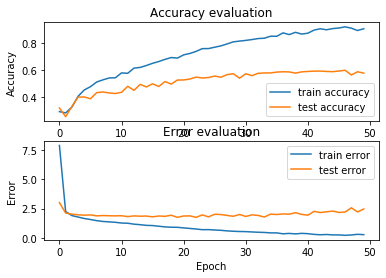

In [8]:
plot_history(history1)

### Handling Overfitting

In [9]:
model=keras.Sequential([
      keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
      keras.layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),keras.layers.Dropout(0.3),
      keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),keras.layers.Dropout(0.3),
      keras.layers.Dense(64,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),keras.layers.Dropout(0.3),
      keras.layers.Dense(10, activation='softmax')
    ])

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
history2=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

219/219 [==============================] - 4s 17ms/step - loss: 2.2036 - accuracy: 0.4076 - val_loss: 2.1311 - val_accuracy: 0.4506
Epoch 48/100
219/219 [==============================] - 4s 17ms/step - loss: 2.1776 - accuracy: 0.4130 - val_loss: 2.1224 - val_accuracy: 0.4596
Epoch 49/100
219/219 [==============================] - 4s 18ms/step - loss: 2.1675 - accuracy: 0.4142 - val_loss: 2.0923 - val_accuracy: 0.4486
Epoch 50/100
219/219 [==============================] - 4s 16ms/step - loss: 2.1149 - accuracy: 0.4249 - val_loss: 2.0776 - val_accuracy: 0.4806
Epoch 51/100
219/219 [==============================] - 4s 17ms/step - loss: 2.0913 - accuracy: 0.4351 - val_loss: 2.0563 - val_accuracy: 0.4720
Epoch 52/100
219/219 [==============================] - 3s 16ms/step - loss: 2.0442 - accuracy: 0.4389 - val_loss: 2.0197 - val_accuracy: 0.4776
Epoch 53/100
219/219 [==============================] - 3s 16ms/step - loss: 2.0333 - accuracy: 0.4471 - val_loss: 2.0198 - val_accuracy: 0.479

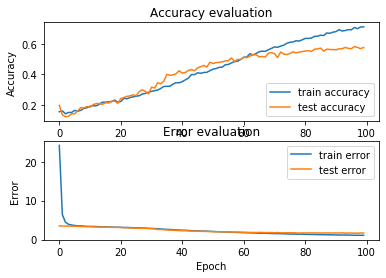

In [10]:
plot_history(history2)

### CNN

In [11]:
def prepare_datasets(test_size,validation_size):

    # load data
    X,y=load_data(DATA_PATH)

    # create train,validation and test split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size)
    X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=validation_size)

    # add an axis to input sets
    X_train=X_train[...,np.newaxis] #4d array => (num_samples,130,13,1)
    X_validation=X_validation[...,np.newaxis]
    X_test=X_test[...,np.newaxis]

    return X_train,X_validation,X_test,y_train,y_validation,y_test

In [12]:
def predict(model, X, y):

    X=X[np.newaxis, ...] # array shape (1, 130, 13, 1)
    prediction=model.predict(X)
    predicted_index=np.argmax(prediction,axis=1)
    print("Target:{},Predicted label:{}".format(y,predicted_index))

In [13]:
np.shape(X)

(9986, 130, 13)

In [15]:
def build_model(input_shape):
    
    model=keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
    model.add(keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32,(2,2),activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64,activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10,activation='softmax'))

    return model

if __name__=="__main__":

    X_train,X_validation,X_test,y_train,y_validation,y_test=prepare_datasets(0.25,0.2)
    input_shape=(X_train.shape[1],X_train.shape[2],1)
    model=build_model(input_shape)
    optimizer=keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    history3=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)
    test_loss,test_acc=model.evaluate(X_test,y_test,verbose=2)
    print('\nTest accuracy:',test_acc)
    
# pick a sample to predict from the test set
X_to_predict=X_test[100]
y_to_predict=y_test[100]
predict(model,X_to_predict,y_to_predict)

Data succesfully loaded!
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_5 (Conv2D)            

In [18]:
print('\nTest accuracy:',test_acc)


Test accuracy: 0.7140568494796753


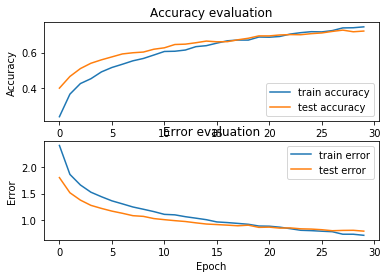

In [16]:
plot_history(history3)

### RNN

In [20]:
def prepare_datasets(test_size, validation_size):

    # load data
    X,y=load_data(DATA_PATH)

    # create train, validation and test split
    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


In [21]:
def build_model(input_shape):

    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test=prepare_datasets(0.25, 0.2)

    # create network
    input_shape=(X_train.shape[1], X_train.shape[2]) # 130, 13
    model=build_model(input_shape)

    # compile model
    optimizer=keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    history4=model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # evaluate model on test set
    test_loss,test_acc=model.evaluate(X_test,y_test,verbose=2)


Data succesfully loaded!
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 130, 64)           19968     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 19s 100ms/step - loss: 2.1791 - accur

In [22]:
print('\nTest accuracy:',test_acc)


Test accuracy: 0.6187424659729004


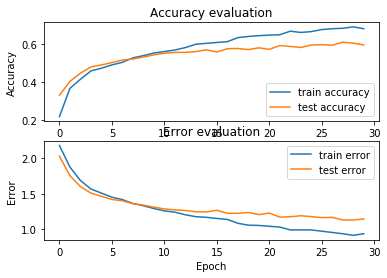

In [23]:
plot_history(history4)